# Bank Marketing Campaign Data Science Project

# Group info

Member: Edward (Guangyan) Huang, guangyan_huang@ucsb.edu, China, UC Santa Barbara, Data Science

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
bank = pd.read_csv("bank-additional-full.csv", delimiter=';')

In [3]:
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [5]:
bank.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


# Firstly, we check whether there are NA values in our dataframe

<AxesSubplot: >

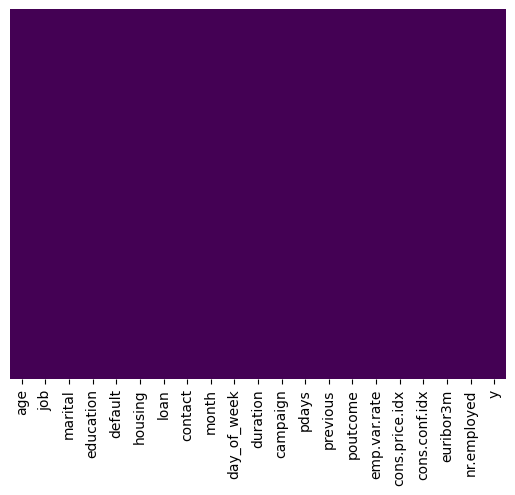

In [6]:
sns.heatmap(bank.isnull(), yticklabels=False, cbar=False, cmap='viridis') 

Interesting, looks like there is no evident aggregation of null values in our dataset, but still there might a few discrete lines with null values.

In [7]:
bank.isnull().any()

age               False
job               False
marital           False
education         False
default           False
housing           False
loan              False
contact           False
month             False
day_of_week       False
duration          False
campaign          False
pdays             False
previous          False
poutcome          False
emp.var.rate      False
cons.price.idx    False
cons.conf.idx     False
euribor3m         False
nr.employed       False
y                 False
dtype: bool

Given this output, there is truly no null values in the dataframe.

# Now let's see whether whether the data is balanced or not

In [8]:
bank['y'].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

Given such distribution of the outcome variable y, it is necessary to perform some measures for balancing data before training the model.

# Before start working, we need to do some basic variable inspection and EDA

C:\Users\Edwar\AppData\Local\Temp\ipykernel_12688\2055536302.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(bank['age'])


<AxesSubplot: xlabel='age', ylabel='Density'>

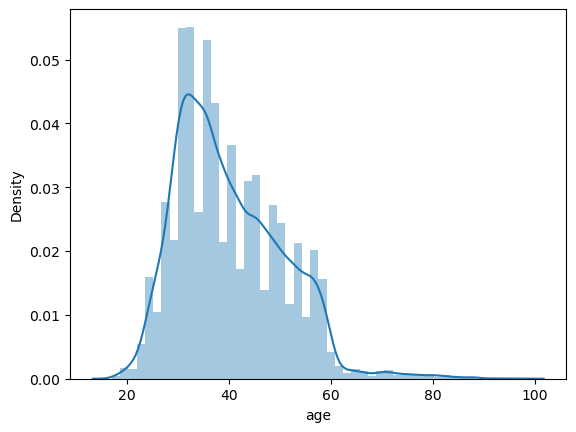

In [9]:
# For column age
sns.distplot(bank['age'])

In [10]:
from scipy.stats import skew
print("Skewness for age :",skew(bank['age']))

Skewness for age : 0.7846682380932289


The distribution of column 'age' for our dataset is right skewed given skewness value is greater than 0

We will use three different approaches: log transformation, square root transformation and box cox transformation and  to deal with the issue of skewness later after EDA.

In [11]:
# bank['age'] = np.log(bank['age'])

In [12]:
# for column job
bank['job'].value_counts()
# The column job is catagorical with 12 levels, 

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

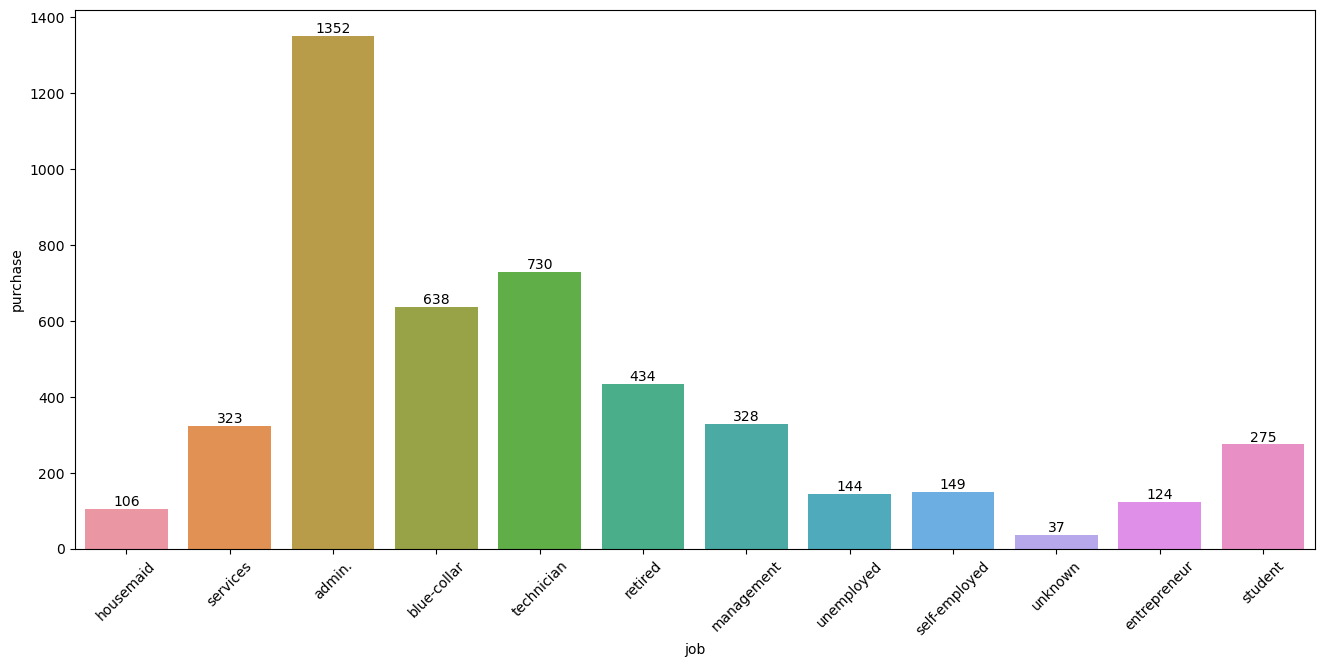

In [13]:
unique_job = list(bank['job'].unique())
unique_job_num = []
for i in unique_job:
    j = bank[(bank['job'] == i) & (bank['y'] == 'yes')]['y'].count()
    unique_job_num.append(j)


unique_job_dict = {'job': unique_job, 'purchase': unique_job_num}
unique_job_df = pd.DataFrame(unique_job_dict)

plt.figure(figsize=(16,7))
ax = sns.barplot(x='job',y='purchase',data=unique_job_df)
for i in ax.containers:
    ax.bar_label(i,)
plt.xticks(rotation=45)
plt.show()

From this chart we can see that among all clients who purchased the termed deposit product, the three most common job titles are administrative, technitian and blue-collar. 

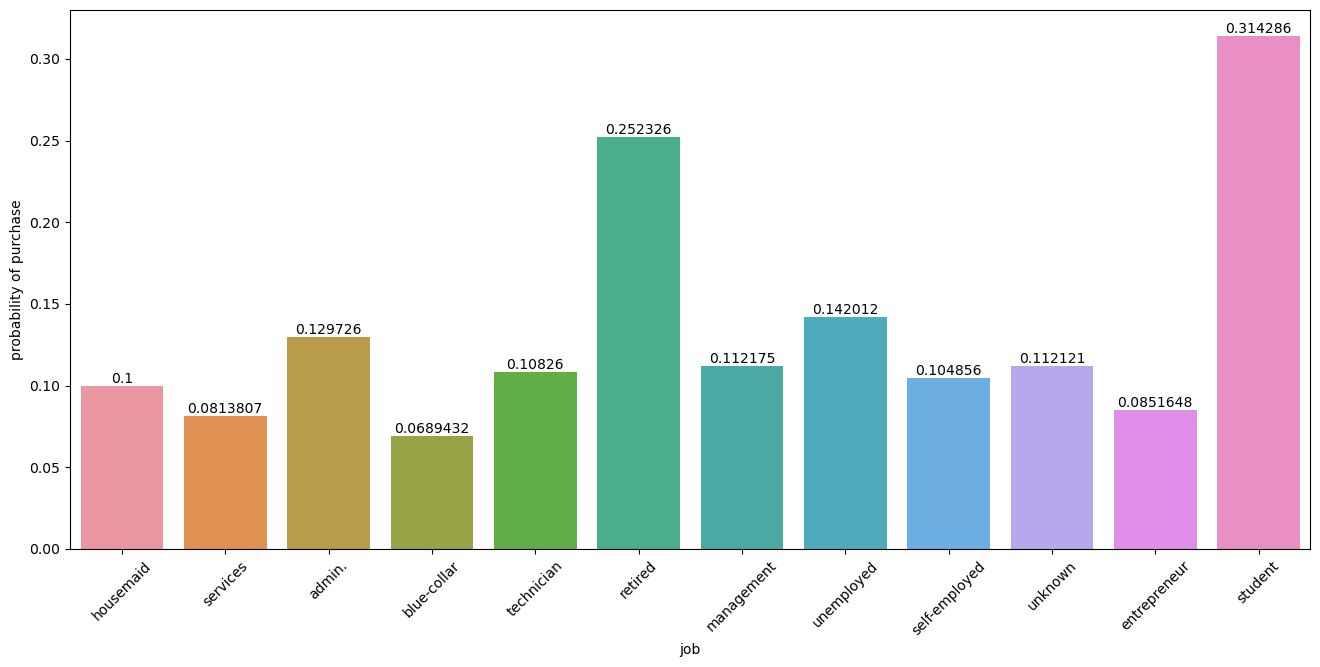

In [14]:
unique_job_portion = []
for i in unique_job:
    j = (bank[(bank['job'] == i) & (bank['y'] == 'yes')]['y'].count())/(bank[bank['job'] == i]['y'].count())
    unique_job_portion.append(j)


unique_job_portion_dict = {'job': unique_job, 'probability of purchase': unique_job_portion}
unique_job_portion_df = pd.DataFrame(unique_job_portion_dict)

plt.figure(figsize=(16,7))
ax = sns.barplot(x='job',y='probability of purchase',data=unique_job_portion_df)
for i in ax.containers:
    ax.bar_label(i,)
plt.xticks(rotation=45)
plt.show()

From the graph above, among all jobs, student is most likely to buy the termed deposit product, followed by retired and unemployed.

At last we need to create dummy variables for this variable job, since it is catagorical

In [15]:
Job = pd.get_dummies(bank['job'], drop_first = True)
bank.drop(['job'], axis=1, inplace = True)
bank = pd.concat([bank, Job], axis = 1)

In [16]:
# for column marital
bank['marital'].value_counts()
# The column marital is catagorical with 4 levels

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64

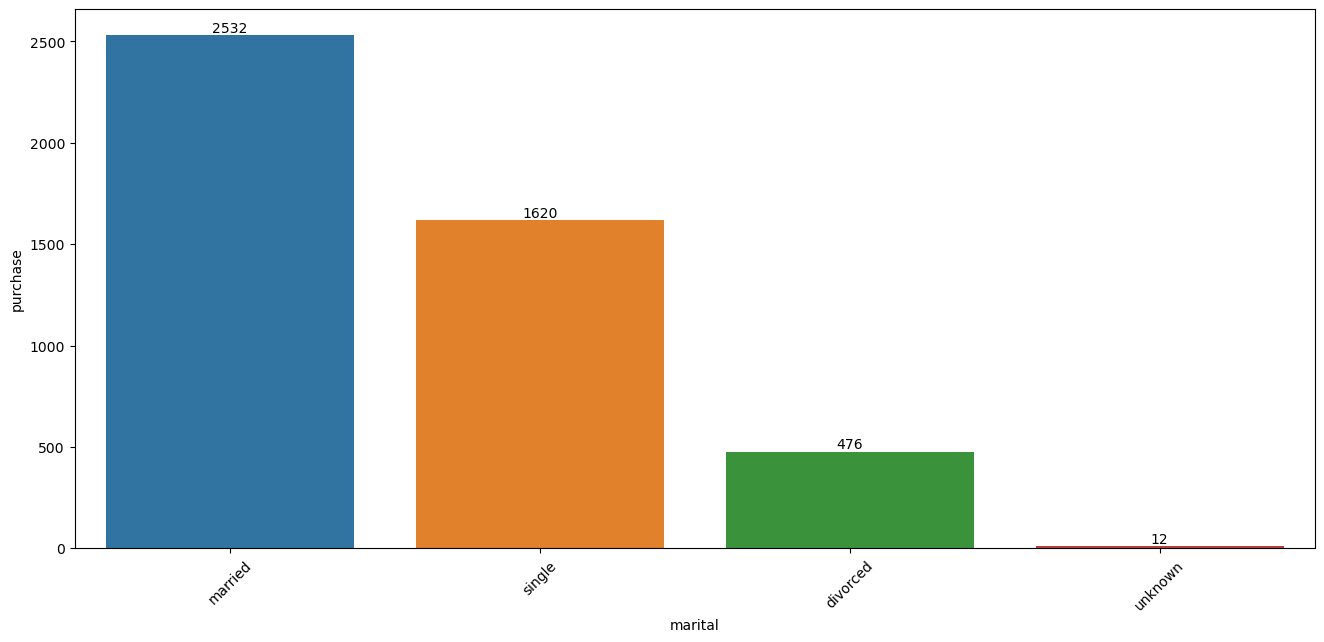

In [17]:
unique_marital = list(bank['marital'].unique())
unique_marital_num = []
for i in unique_marital:
    j = bank[(bank['marital'] == i) & (bank['y'] == 'yes')]['y'].count()
    unique_marital_num.append(j)


unique_marital_dict = {'marital': unique_marital, 'purchase': unique_marital_num}
unique_marital_df = pd.DataFrame(unique_marital_dict)

plt.figure(figsize=(16,7))
ax = sns.barplot(x='marital',y='purchase',data=unique_marital_df)
for i in ax.containers:
    ax.bar_label(i,)
plt.xticks(rotation=45)
plt.show()

It is evident that more than half of all clients who purchased the termed deposit product are married.

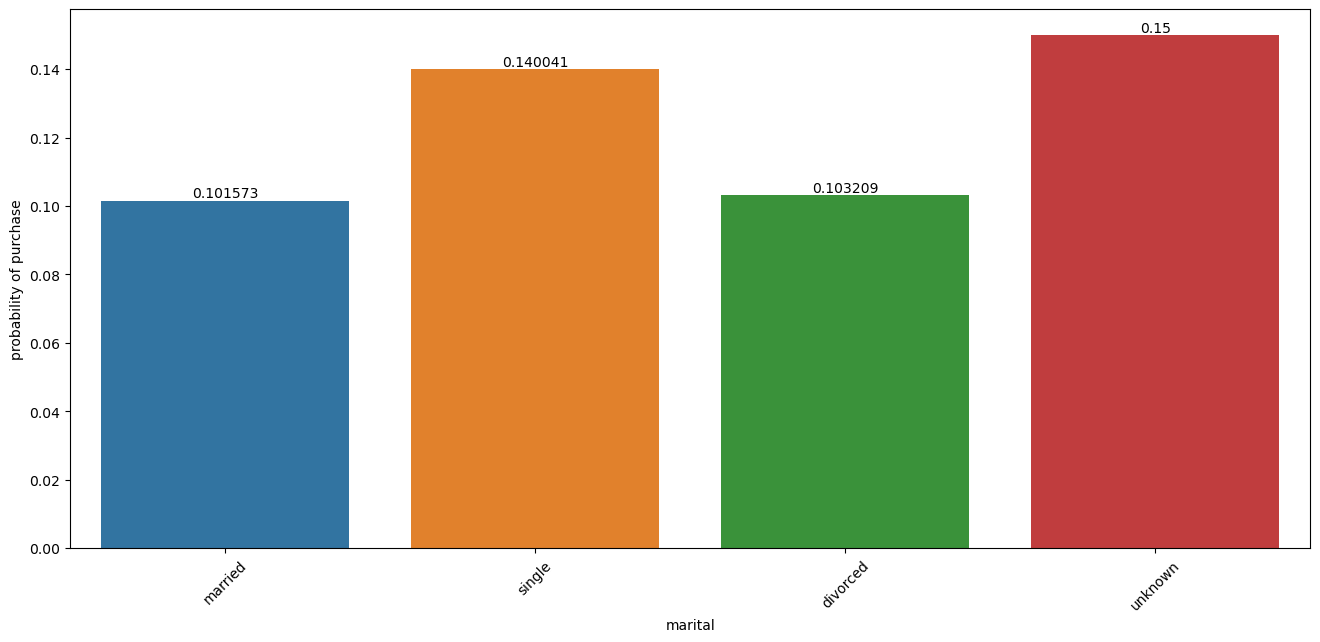

In [18]:
unique_marital_portion = []
for i in unique_marital:
    j = (bank[(bank['marital'] == i) & (bank['y'] == 'yes')]['y'].count())/(bank[bank['marital'] == i]['y'].count())
    unique_marital_portion.append(j)


unique_marital_portion_dict = {'marital': unique_marital, 'probability of purchase': unique_marital_portion}
unique_marital_portion_df = pd.DataFrame(unique_marital_portion_dict)

unique_marital_portion_df.head()
plt.figure(figsize=(16,7))
ax = sns.barplot(x='marital',y='probability of purchase',data=unique_marital_portion_df)
for i in ax.containers:
    ax.bar_label(i,)
plt.xticks(rotation=45)
plt.show()

Surprisingly, leaving the small 'unknown' group apart, for the three levels of variable 'marital', clients with status 'single' is most likely to purchase the product.

In [19]:
Marital = pd.get_dummies(bank['marital'], drop_first = True)
Marital.head()

,married,single,unknown
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [20]:
Marital = Marital.rename(columns = {"married":"Marital_married", "single":"Marital_single","unknown":"Marital_unknown"})

In [21]:
bank.drop(['marital'], axis=1, inplace = True)
bank = pd.concat([bank, Marital], axis = 1)

In [22]:
# for column education
bank['education'].value_counts()
# The column educatioin is catagorical with 8 levels

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

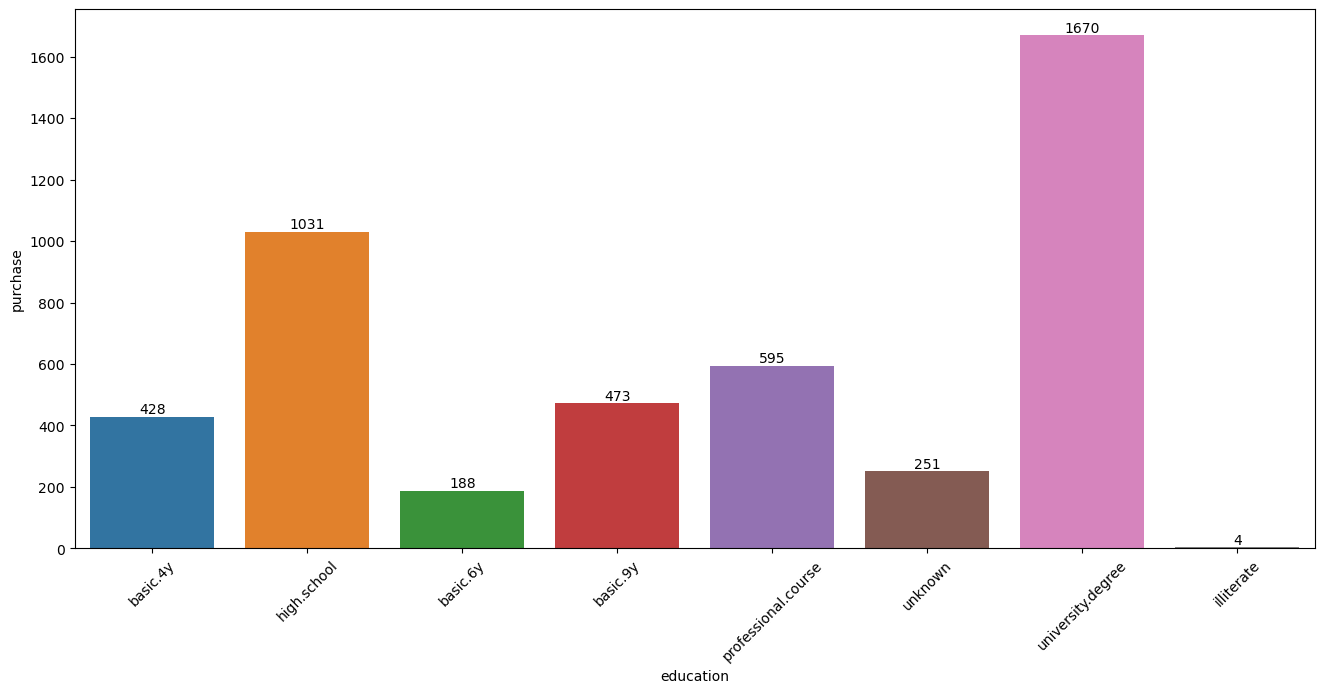

In [23]:
unique_education = list(bank['education'].unique())
unique_education_num = []
for i in unique_education:
    j = bank[(bank['education'] == i) & (bank['y'] == 'yes')]['y'].count()
    unique_education_num.append(j)


unique_education_dict = {'education': unique_education, 'purchase': unique_education_num}
unique_education_df = pd.DataFrame(unique_education_dict)

plt.figure(figsize=(16,7))
ax = sns.barplot(x= 'education', y='purchase',data = unique_education_df)
for i in ax.containers:
    ax.bar_label(i,)
plt.xticks(rotation=45)
plt.show()

Among all levels of education, most clients who purchased the product have university degrees, followed by clients with high school deploma

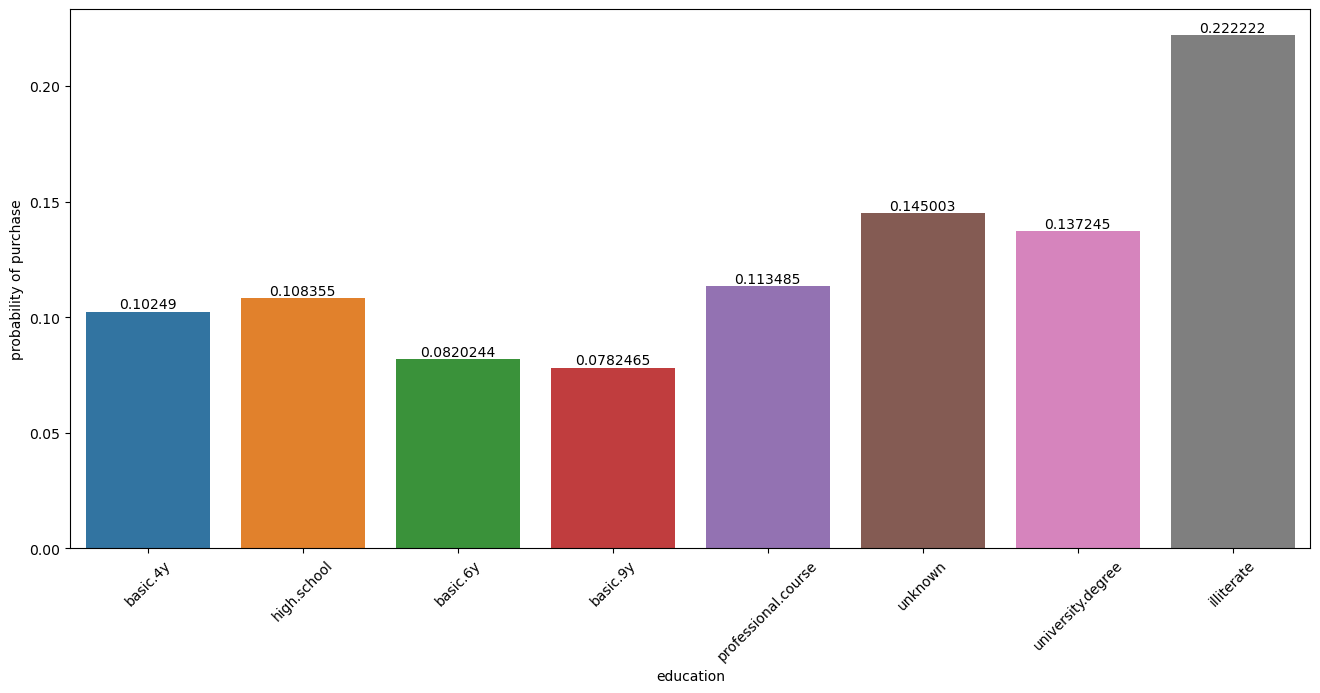

In [24]:
unique_education_portion = []
for i in unique_education:
    j = (bank[(bank['education'] == i) & (bank['y'] == 'yes')]['y'].count())/(bank[bank['education'] == i]['y'].count())
    unique_education_portion.append(j)


unique_education_portion_dict = {'education': unique_education, 'probability of purchase': unique_education_portion}
unique_education_portion_df = pd.DataFrame(unique_education_portion_dict)

unique_education_portion_df.head()
plt.figure(figsize=(16,7))
ax = sns.barplot(x='education',y='probability of purchase',data=unique_education_portion_df)
for i in ax.containers:
    ax.bar_label(i,)
plt.xticks(rotation=45)
plt.show()

From this chart, although clieants with education level 'illiterate' or 'unknown' are most likely to purchase the product, those two groups only count for a small part of the whole client population, leaving them apart, clients with education level 'university degree' are still the population group who are most likely to purchase the product.

In [25]:
Education = pd.get_dummies(bank['education'], drop_first = True)
Education.head()

,basic.6y,basic.9y,high.school,illiterate,professional.course,university.degree,unknown
0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0
2,0,0,1,0,0,0,0
3,1,0,0,0,0,0,0
4,0,0,1,0,0,0,0


In [26]:
Education = Education.rename(columns = {"basic.6y":"Education_basic.6y", 
                                    "basic.9y":"Education_basic.9y",
                                    "high.school":"Education_high.school",
                                    "illiterate":"Education_illiterate",
                                    "professional.course":"Education_professional.course",
                                    "university.degree":"Education_university.degree",
                                    "unknown":"Education_unknown"})

In [27]:
bank.drop(['education'], axis=1, inplace = True)
bank = pd.concat([bank, Education], axis = 1)

In [28]:
# For column default
bank['default'].value_counts()
# The column marital is catagorical with 3 levels

no         32588
unknown     8597
yes            3
Name: default, dtype: int64

The interpretation of this attribute is 'having credit in default or not' for a single client.

Given variable 'default' has only three levels, there is no need to elaborate on the analysis of our outcome with respect to it, since the interpretation of 'default' is 'having credit in default or not' and banks always prefer reaching out to clients without severe delinquency record.

In [29]:
Default = pd.get_dummies(bank['default'], drop_first = True)
Default.head()

,unknown,yes
0,0,0
1,1,0
2,0,0
3,0,0
4,0,0


In [30]:
Default = Default.rename(columns = {"unknown":"Default_unknown", 
                                    "yes":"Default_yes"})

In [31]:
bank.drop(['default'], axis=1, inplace = True)
bank = pd.concat([bank, Default], axis = 1)

In [32]:
# For column housing
bank['housing'].value_counts()
# The column housing is catagorical with 3 levels

yes        21576
no         18622
unknown      990
Name: housing, dtype: int64

The interpretation of this attribute is 'have house loan or not'

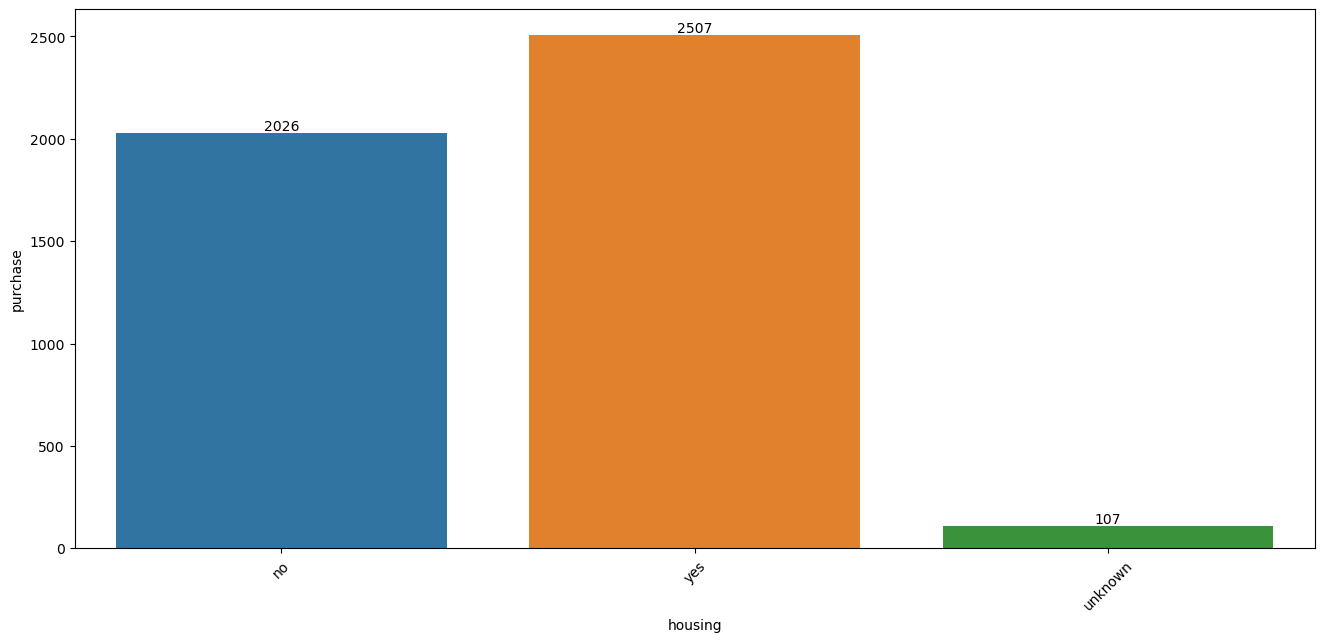

In [33]:
unique_housing = list(bank['housing'].unique())
unique_housing_num = []
for i in unique_housing:
    j = bank[(bank['housing'] == i) & (bank['y'] == 'yes')]['y'].count()
    unique_housing_num.append(j)


unique_housing_dict = {'housing': unique_housing, 'purchase': unique_housing_num}
unique_housing_df = pd.DataFrame(unique_housing_dict)

plt.figure(figsize=(16,7))
ax = sns.barplot(x= 'housing', y='purchase',data = unique_housing_df)
for i in ax.containers:
    ax.bar_label(i,)
plt.xticks(rotation=45)
plt.show()

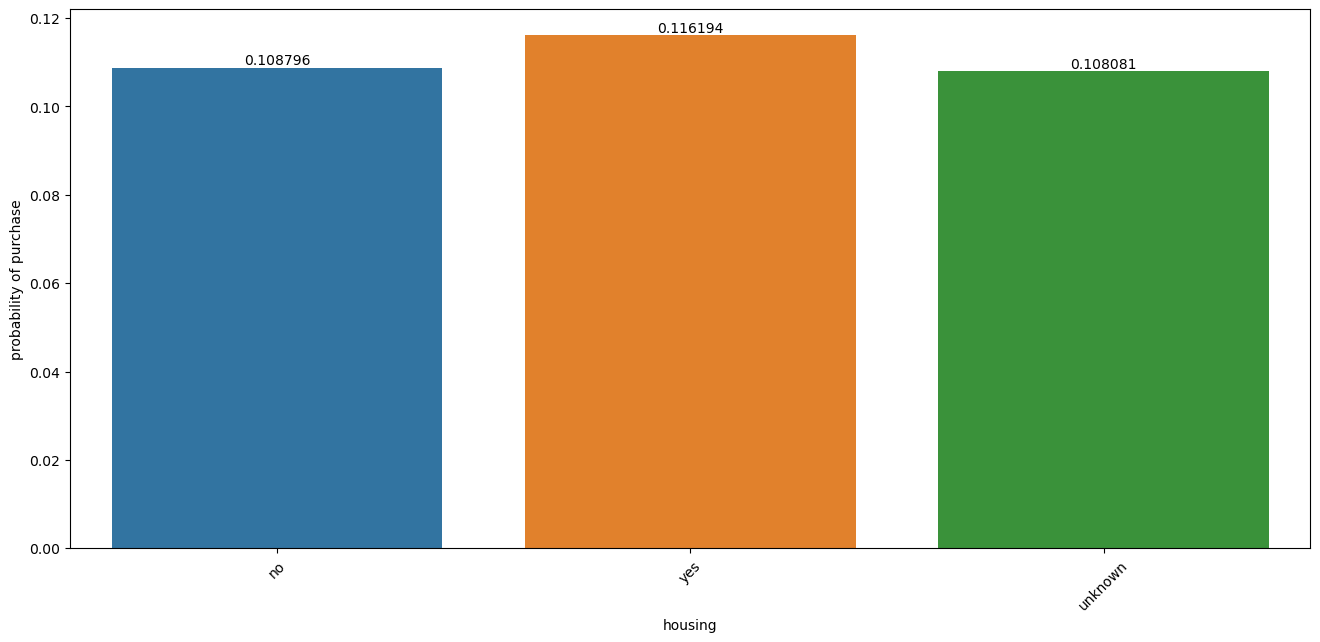

In [34]:
unique_housing_portion = []
for i in unique_housing:
    j = (bank[(bank['housing'] == i) & (bank['y'] == 'yes')]['y'].count())/(bank[bank['housing'] == i]['y'].count())
    unique_housing_portion.append(j)


unique_housing_portion_dict = {'housing': unique_housing, 'probability of purchase': unique_housing_portion}
unique_housing_portion_df = pd.DataFrame(unique_housing_portion_dict)

unique_housing_portion_df.head()
plt.figure(figsize=(16,7))
ax = sns.barplot(x='housing',y='probability of purchase',data=unique_housing_portion_df)
for i in ax.containers:
    ax.bar_label(i,)
plt.xticks(rotation=45)
plt.show()

From this graph we can see the portion of clients who purcahsed the product is approximately same for all three levels of 'housing'.

In [35]:
Housing = pd.get_dummies(bank['housing'], drop_first = True)
Housing.head()

,unknown,yes
0,0,0
1,0,0
2,0,1
3,0,0
4,0,0


In [36]:
Housing = Housing.rename(columns = {"unknown":"Housing_unknown", 
                                    "yes":"Housing_yes"})

In [37]:
bank.drop(['housing'], axis=1, inplace = True)
bank = pd.concat([bank, Housing], axis = 1)

In [38]:
# For column loan
bank['loan'].value_counts()
# The column loan is catagorical with 3 levels

no         33950
yes         6248
unknown      990
Name: loan, dtype: int64

The interpretatiion of this attribute is 'having personal loan or not'

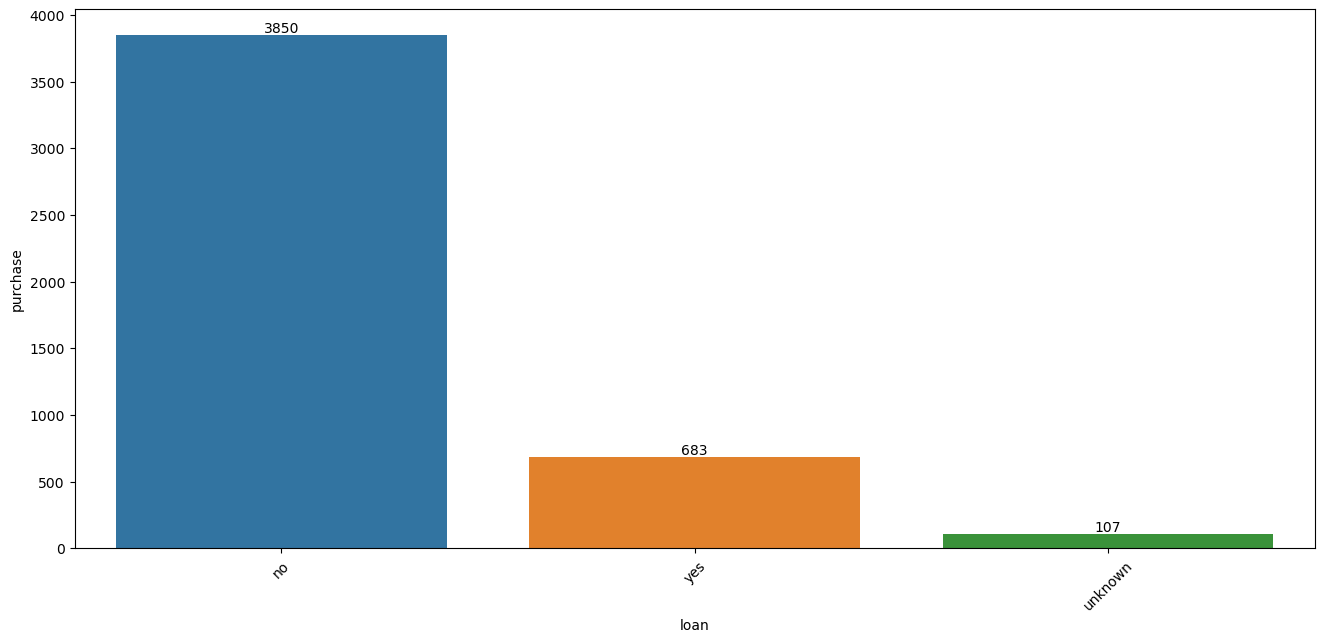

In [39]:
unique_loan = list(bank['loan'].unique())
unique_loan_num = []
for i in unique_loan:
    j = bank[(bank['loan'] == i) & (bank['y'] == 'yes')]['y'].count()
    unique_loan_num.append(j)


unique_loan_dict = {'loan': unique_loan, 'purchase': unique_loan_num}
unique_loan_df = pd.DataFrame(unique_loan_dict)

plt.figure(figsize=(16,7))
ax = sns.barplot(x= 'loan', y='purchase',data = unique_loan_df)
for i in ax.containers:
    ax.bar_label(i,)
plt.xticks(rotation=45)
plt.show()

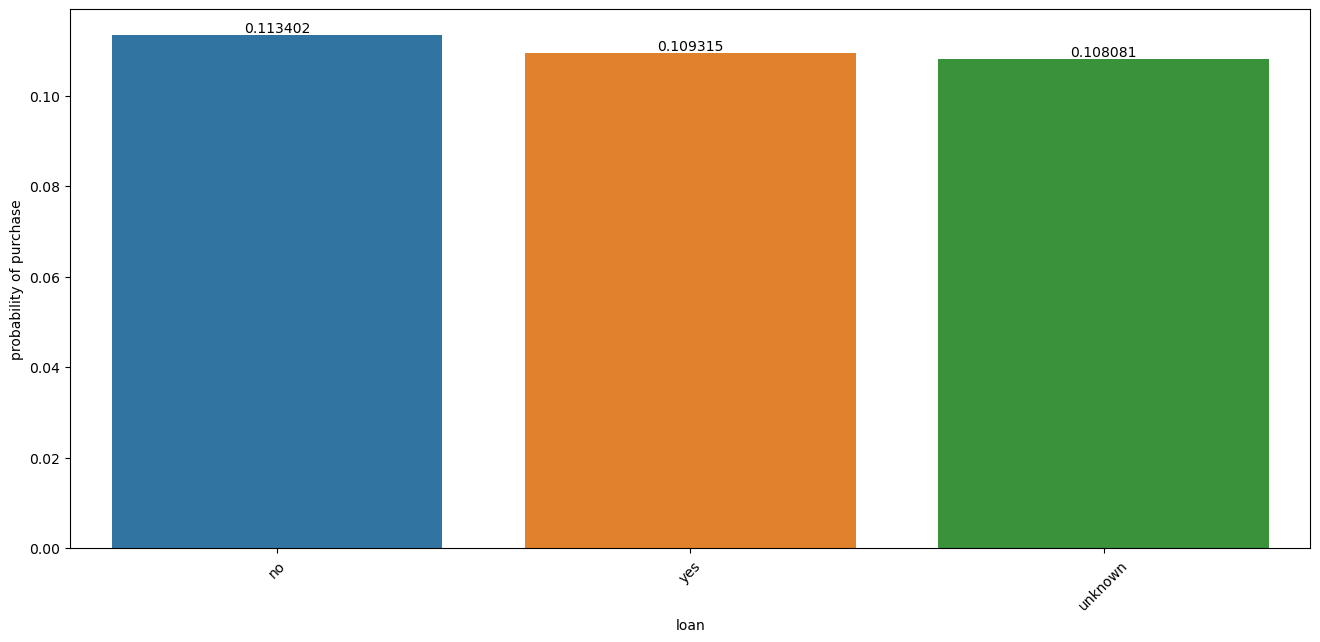

In [40]:
unique_loan_portion = []
for i in unique_loan:
    j = (bank[(bank['loan'] == i) & (bank['y'] == 'yes')]['y'].count())/(bank[bank['loan'] == i]['y'].count())
    unique_loan_portion.append(j)


unique_loan_portion_dict = {'loan': unique_loan, 'probability of purchase': unique_loan_portion}
unique_loan_portion_df = pd.DataFrame(unique_loan_portion_dict)

unique_housing_portion_df.head()
plt.figure(figsize=(16,7))
ax = sns.barplot(x='loan',y='probability of purchase',data=unique_loan_portion_df)
for i in ax.containers:
    ax.bar_label(i,)
plt.xticks(rotation=45)
plt.show()

Among three levels for attribute 'loan', clients with no personal loan are slightly more likely to purchase the product.

In [41]:
Loan = pd.get_dummies(bank['loan'], drop_first = True)
Loan.head()

,unknown,yes
0,0,0
1,0,0
2,0,0
3,0,0
4,0,1


In [42]:
Loan = Loan.rename(columns = {"unknown":"Loan_unknown", 
                                    "yes":"Loan_yes"})

In [43]:
bank.drop(['loan'], axis=1, inplace = True)
bank = pd.concat([bank, Loan], axis = 1)

# Now we are done with the EDA and data cleansing/transformation of every attribute in the 'Client Information' part

# EDA and data cleansing/transformation for previous contact information

In [44]:
# For column loan
bank['contact'].value_counts()
# The column contact is catagorical with 2 levels

cellular     26144
telephone    15044
Name: contact, dtype: int64

This attribute is the way of contact the bank used when reaching out toward the client

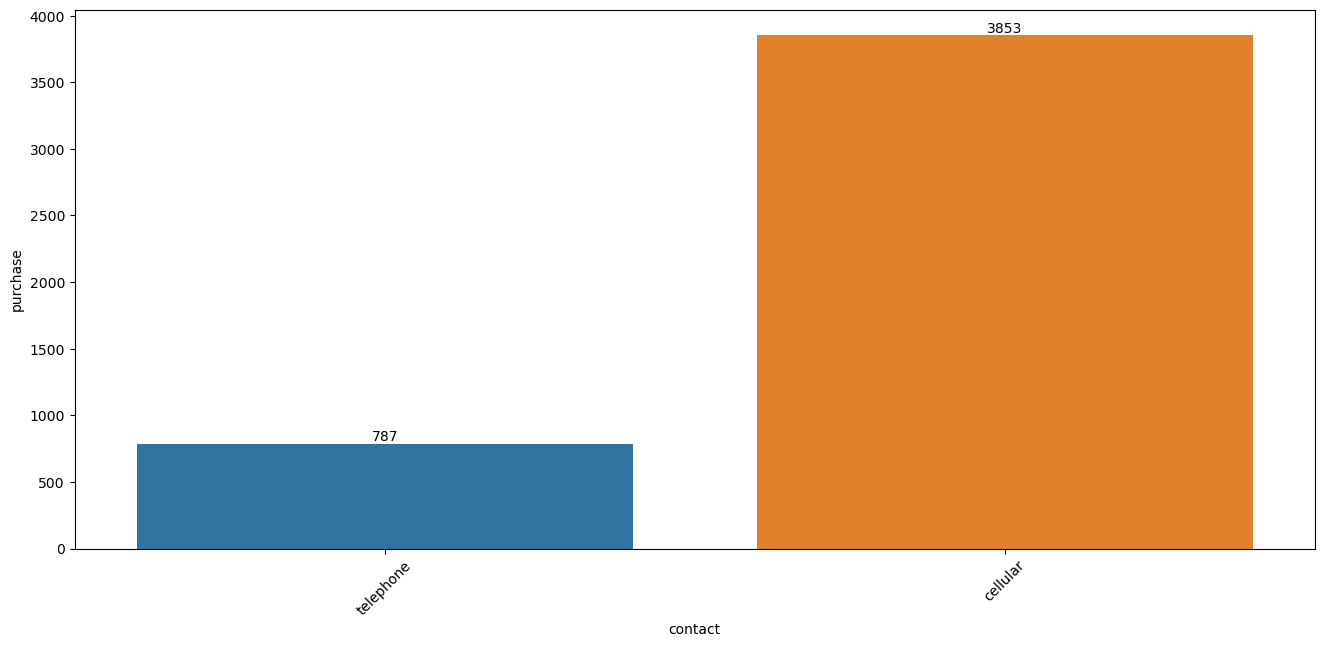

In [45]:
unique_contact = list(bank['contact'].unique())
unique_contact_num = []
for i in unique_contact:
    j = bank[(bank['contact'] == i) & (bank['y'] == 'yes')]['y'].count()
    unique_contact_num.append(j)


unique_contact_dict = {'contact': unique_contact, 'purchase': unique_contact_num}
unique_contact_df = pd.DataFrame(unique_contact_dict)

plt.figure(figsize=(16,7))
ax = sns.barplot(x= 'contact', y='purchase',data = unique_contact_df)
for i in ax.containers:
    ax.bar_label(i,)
plt.xticks(rotation=45)
plt.show()

Looks like amount of deals made via text message outweighs amount of deals made with phone call

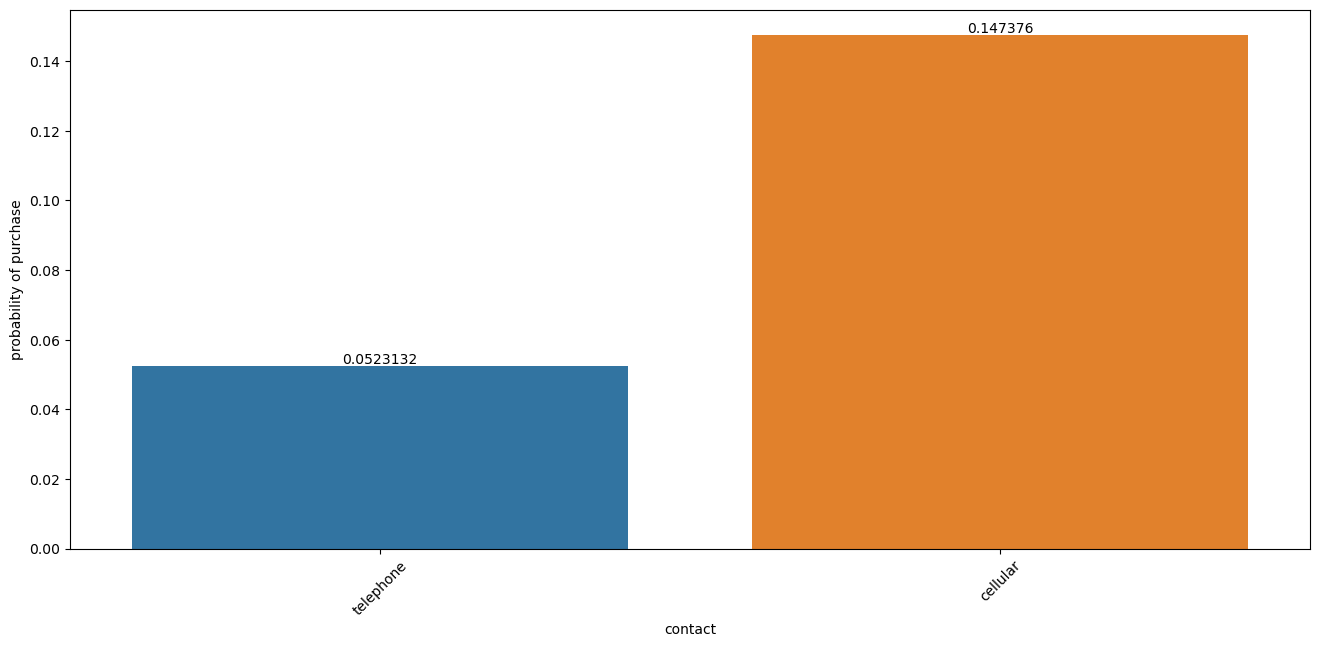

In [46]:
unique_contact_portion = []
for i in unique_contact:
    j = (bank[(bank['contact'] == i) & (bank['y'] == 'yes')]['y'].count())/(bank[bank['contact'] == i]['y'].count())
    unique_contact_portion.append(j)


unique_contact_portion_dict = {'contact': unique_contact, 'probability of purchase': unique_contact_portion}
unique_contact_portion_df = pd.DataFrame(unique_contact_portion_dict)

unique_contact_portion_df.head()
plt.figure(figsize=(16,7))
ax = sns.barplot(x='contact',y='probability of purchase',data=unique_contact_portion_df)
for i in ax.containers:
    ax.bar_label(i,)
plt.xticks(rotation=45)
plt.show()

Yeah, looks like the probability of a client to buy the product is three times higher if the bank chooses text messages as contact

In [47]:
Contact = pd.get_dummies(bank['contact'], drop_first = True)
Contact.head()

,telephone
0,1
1,1
2,1
3,1
4,1


In [48]:
Contact = Contact.rename(columns = {"telephone":"Contact_telephone"})

In [49]:
bank.drop(['contact'], axis=1, inplace = True)
bank = pd.concat([bank, Contact], axis = 1)

In [50]:
# For column month
bank['month'].value_counts()
# The column month is catagorical with 10 levels, from March to December, it is reasonable that January and Feburary 
# are excluded, since the campaign each year lasts from March to December

may    13769
jul     7174
aug     6178
jun     5318
nov     4101
apr     2632
oct      718
sep      570
mar      546
dec      182
Name: month, dtype: int64

This attribute is the month when the bank made their last contact to the client.

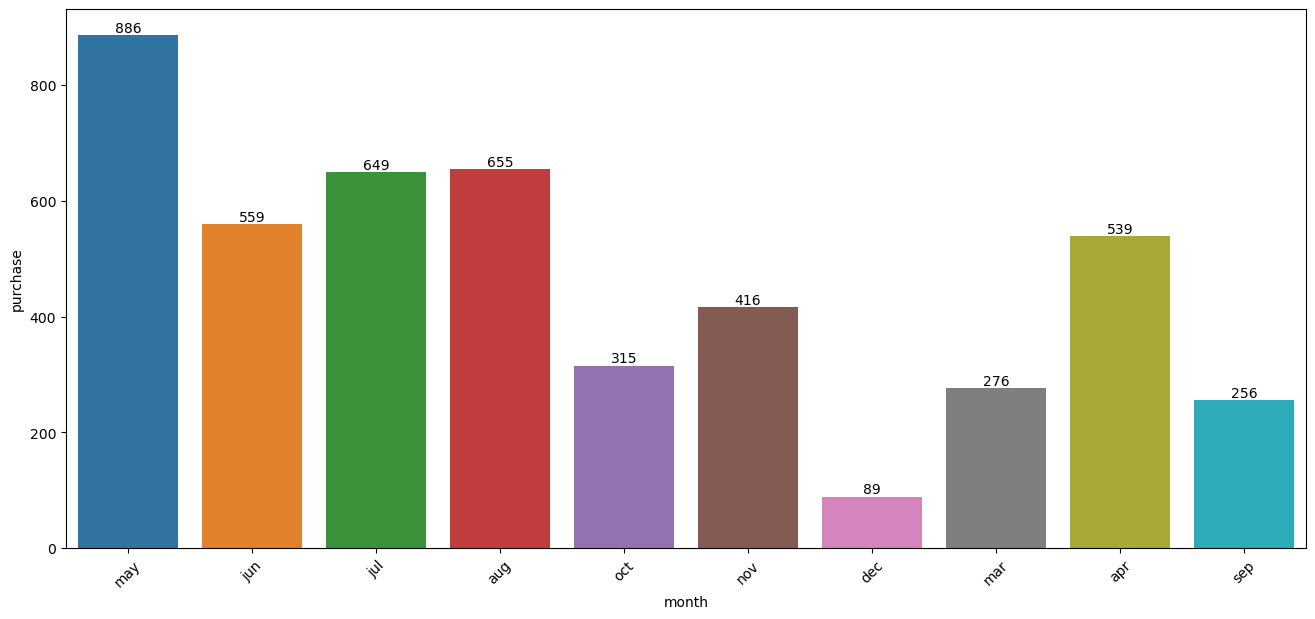

In [51]:
unique_month = list(bank['month'].unique())
unique_month_num = []
for i in unique_month:
    j = bank[(bank['month'] == i) & (bank['y'] == 'yes')]['y'].count()
    unique_month_num.append(j)


unique_month_dict = {'month': unique_month, 'purchase': unique_month_num}
unique_month_df = pd.DataFrame(unique_month_dict)

plt.figure(figsize=(16,7))
ax = sns.barplot(x= 'month', y='purchase',data = unique_month_df)
for i in ax.containers:
    ax.bar_label(i,)
plt.xticks(rotation=45)
plt.show()

Among the ten months of each campaign, the three months with most deals made are May, July and August.

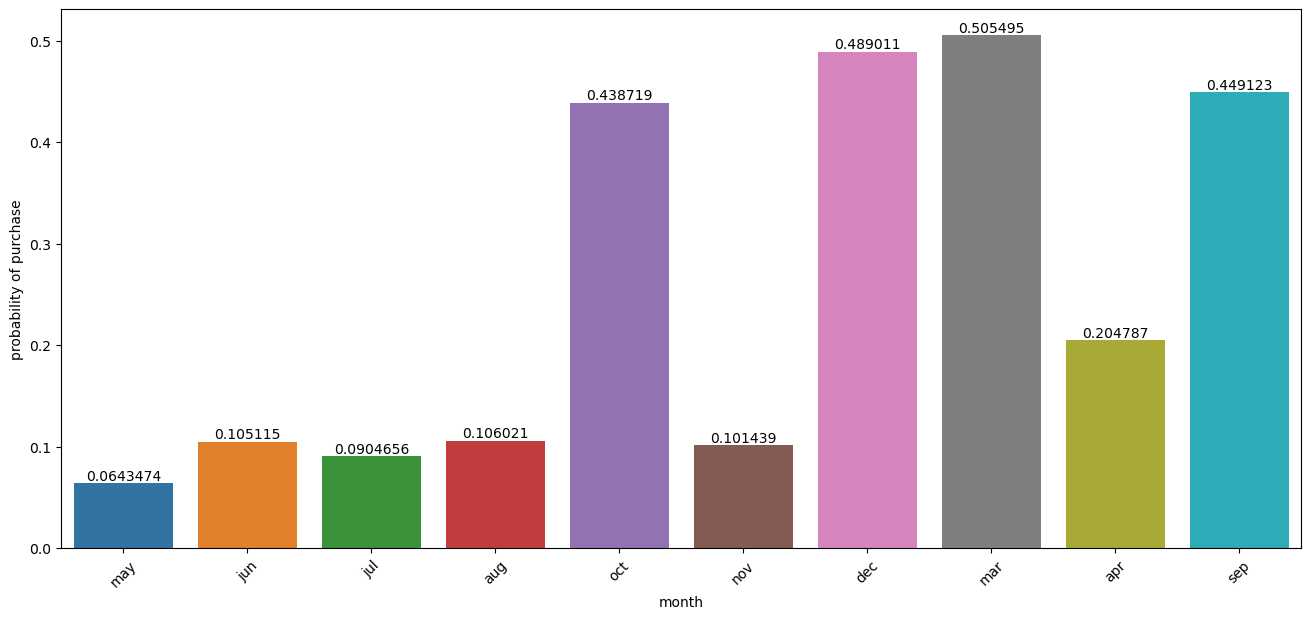

In [52]:
unique_month_portion = []
for i in unique_month:
    j = (bank[(bank['month'] == i) & (bank['y'] == 'yes')]['y'].count())/(bank[bank['month'] == i]['y'].count())
    unique_month_portion.append(j)


unique_month_portion_dict = {'month': unique_month, 'probability of purchase': unique_month_portion}
unique_month_portion_df = pd.DataFrame(unique_month_portion_dict)

unique_month_portion_df.head()
plt.figure(figsize=(16,7))
ax = sns.barplot(x='month',y='probability of purchase',data=unique_month_portion_df)
for i in ax.containers:
    ax.bar_label(i,)
plt.xticks(rotation=45)
plt.show()

However, in the ten-month campaign, March, December and October are three months with highest probability to persuade a client to by the deposit product. In those months the total number of clients the bank reached out only counts for a small part of the whole client population.

In [53]:
Month = pd.get_dummies(bank['month'], drop_first = True)
Month.head()

,aug,dec,jul,jun,mar,may,nov,oct,sep
0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,1,0,0,0


In [54]:
bank.drop(['month'], axis=1, inplace = True)
bank = pd.concat([bank, Month], axis = 1)

In [55]:
# For column day_of_week
bank['day_of_week'].value_counts()

thu    8623
mon    8514
wed    8134
tue    8090
fri    7827
Name: day_of_week, dtype: int64

This attribute is interpreted as the work day in a week that the bank made their last contact to a client

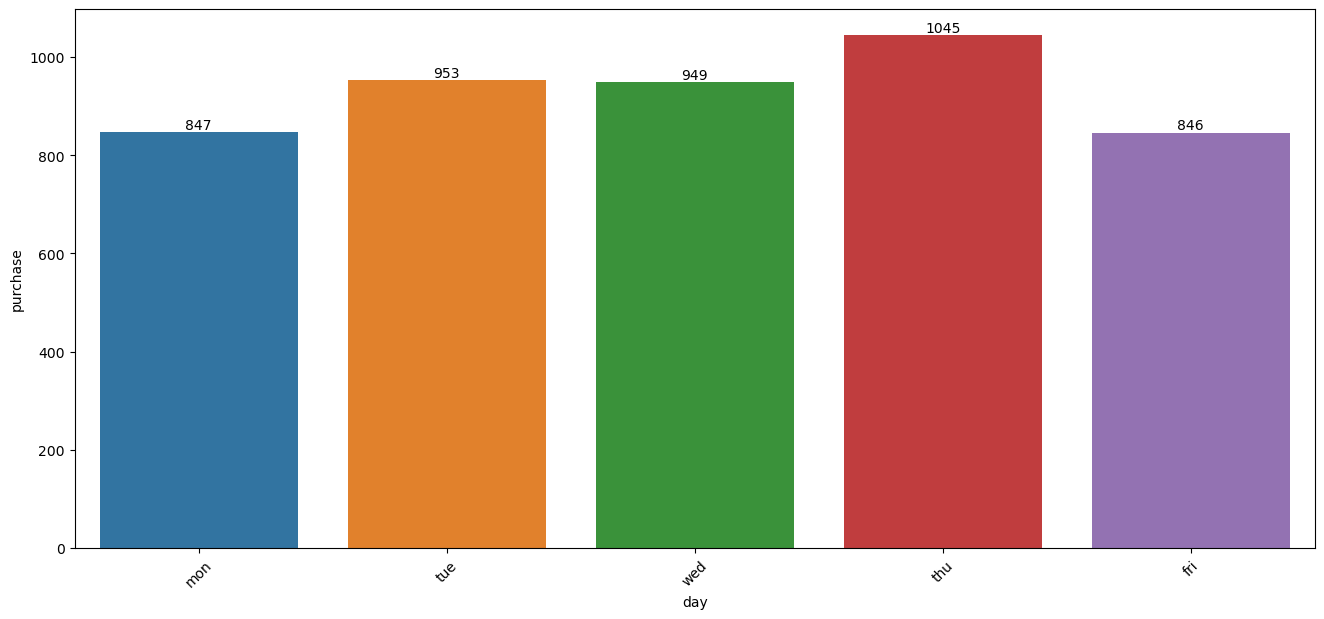

In [56]:
unique_day = list(bank['day_of_week'].unique())
unique_day_num = []
for i in unique_day:
    j = bank[(bank['day_of_week'] == i) & (bank['y'] == 'yes')]['y'].count()
    unique_day_num.append(j)


unique_day_dict = {'day': unique_day, 'purchase': unique_day_num}
unique_day_df = pd.DataFrame(unique_day_dict)

plt.figure(figsize=(16,7))
ax = sns.barplot(x= 'day', y='purchase',data = unique_day_df)
for i in ax.containers:
    ax.bar_label(i,)
plt.xticks(rotation=45)
plt.show()

From the graph, nummber of deals made is split in a relatively uniform way among all five workdays in a week

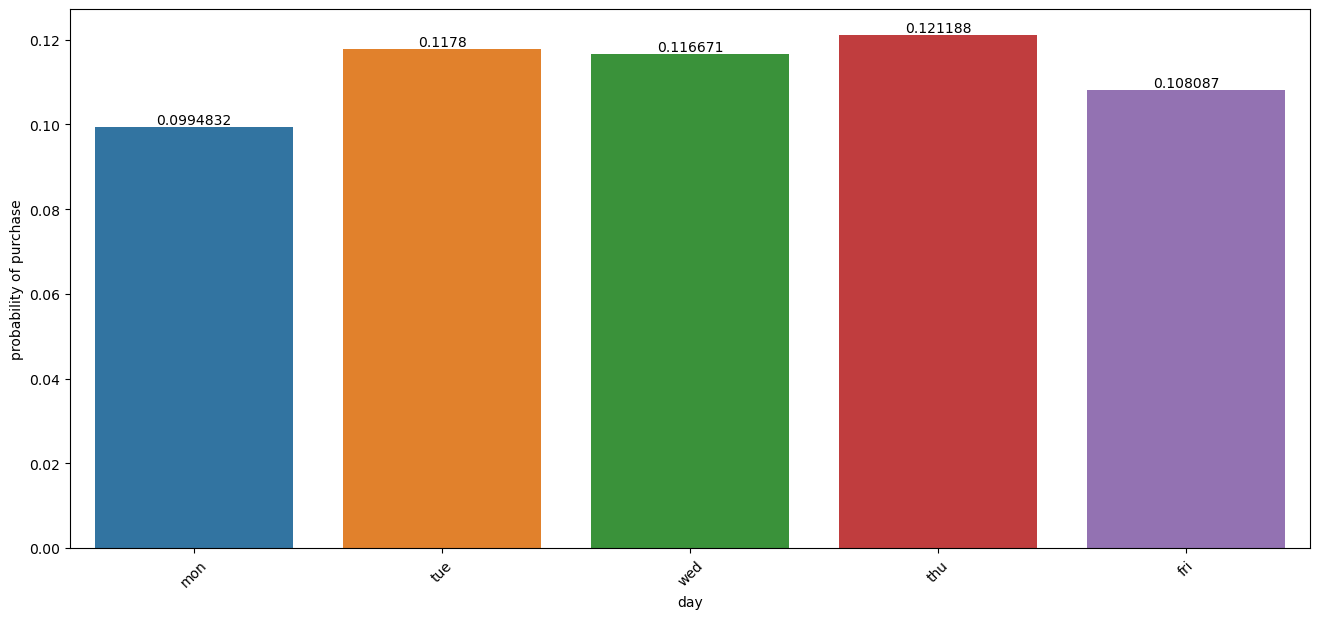

In [57]:
unique_day_portion = []
for i in unique_day:
    j = (bank[(bank['day_of_week'] == i) & (bank['y'] == 'yes')]['y'].count())/(bank[bank['day_of_week'] == i]['y'].count())
    unique_day_portion.append(j)


unique_day_portion_dict = {'day': unique_day, 'probability of purchase': unique_day_portion}
unique_day_portion_df = pd.DataFrame(unique_day_portion_dict)

unique_day_portion_df.head()
plt.figure(figsize=(16,7))
ax = sns.barplot(x='day',y='probability of purchase',data=unique_day_portion_df)
for i in ax.containers:
    ax.bar_label(i,)
plt.xticks(rotation=45)
plt.show()

For all five workdays, even the probability of successfully making a deal is pretty close, while Monday and Friday have probability slightly lower.

In [58]:
Day = pd.get_dummies(bank['day_of_week'], drop_first = True)
Day.head()

,mon,thu,tue,wed
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0


In [59]:
bank.drop(['day_of_week'], axis=1, inplace = True)
bank = pd.concat([bank, Day], axis = 1)

C:\Users\Edwar\AppData\Local\Temp\ipykernel_12688\3721528980.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(bank['duration'])


<AxesSubplot: xlabel='duration', ylabel='Density'>

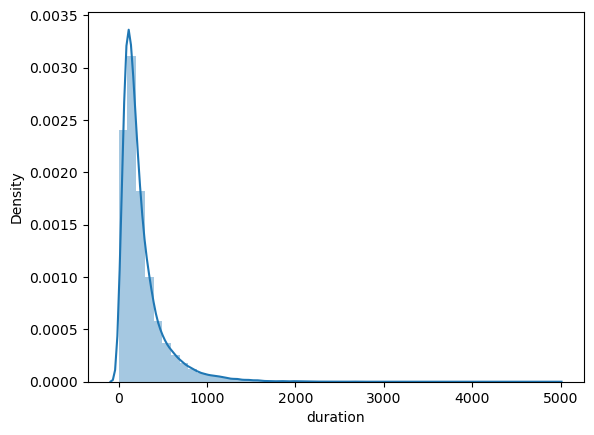

In [60]:
# For column duration
sns.distplot(bank['duration'])
# This attribute is numerical

In [61]:
print("Skewness for duration :",skew(bank['duration']))

Skewness for duration : 3.2630224157610432


This attribute is the length of contact in seconds for the last contact of the bank toward a client, however, notice that this attribute can't be used for a predictive model, since the bank can't control the length of a conversation with its clients. Given skewness for duration is so high, transformations later are also needed. 

C:\Users\Edwar\AppData\Local\Temp\ipykernel_12688\351355372.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(bank['campaign'])


<AxesSubplot: xlabel='campaign', ylabel='Density'>

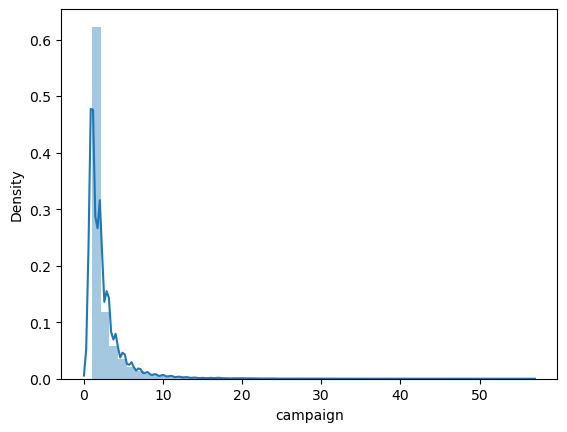

In [62]:
# For column campaign
sns.distplot(bank['campaign'])

This attribute is the number of times the bank reaches out toward a client within this single campaign, the distribution of this numerical attribute is also right skewed, and we will perform same transformations later. 

In [63]:
print("Skewness for campaign :",skew(bank['campaign']))

Skewness for campaign : 4.762333252560971


<Figure size 900x500 with 0 Axes>

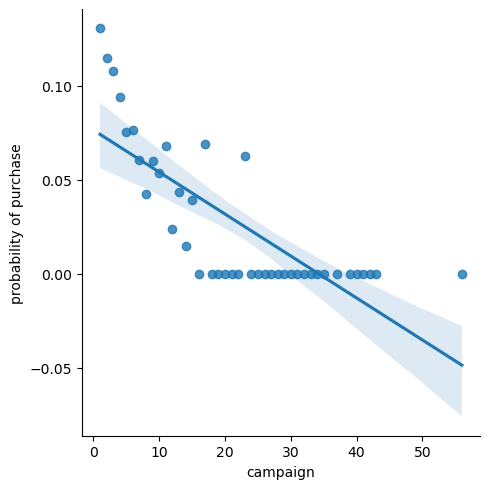

In [64]:
unique_campaign = list(bank['campaign'].unique())
unique_campaign_portion = []
for i in unique_campaign :
    j = (bank[(bank['campaign'] == i) & (bank['y'] == 'yes')]['y'].count())/(bank[bank['campaign'] == i]['y'].count())
    unique_campaign_portion.append(j)


unique_campaign_dict = {'campaign': unique_campaign, 'probability of purchase': unique_campaign_portion}
unique_campaign_df = pd.DataFrame(unique_campaign_dict)

plt.figure(figsize=(9,5))
ax = sns.lmplot(x='campaign',y='probability of purchase', data=unique_campaign_df)

From this graph, no conclusion can be made about the correlation between probability of purcahse and campaign.

In [65]:
# For column pdays
bank['pdays'].value_counts()
# This numerical attribute is number of days that passed by after the client was last contacted from a previous campaign 
# (That is, the campaign before this one)
# Here 999 stands for 'never reached out in last campaign'

999    39673
3        439
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
22         3
19         3
21         2
25         1
26         1
27         1
20         1
Name: pdays, dtype: int64

This attribute needs to be adjusted for later model training.

In [66]:
Contacted_in_last_campaign = []
Days_from_last_contact_in_last_campaign = []
for i in range(len(bank)):
    if bank.iloc[i]['pdays'] == 999:
        Contacted_in_last_campaign.append('no')
        Days_from_last_contact_in_last_campaign.append(0)     
    else:
        Contacted_in_last_campaign.append('yes')
        Days_from_last_contact_in_last_campaign.append(bank.iloc[i]['pdays']) 

Contact_last_campaign = {'Contacted in last campaign': Contacted_in_last_campaign, 
                         'Days from last contact in last campaign': Days_from_last_contact_in_last_campaign}
Contact_last_campaign_df = pd.DataFrame(Contact_last_campaign)

In [67]:
bank.drop(['pdays'], axis=1, inplace = True)
bank = pd.concat([bank, Contact_last_campaign_df], axis = 1)

<Figure size 900x500 with 0 Axes>

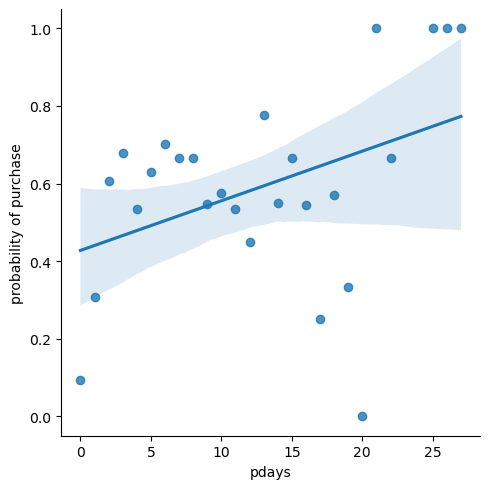

In [68]:
unique_pdays = list(bank['Days from last contact in last campaign'].unique())
unique_pdays_portion = []
for i in unique_pdays :
    j = (bank[(bank['Days from last contact in last campaign'] == i) & (bank['y'] == 'yes')]['y'].count())/(bank[bank['Days from last contact in last campaign'] == i]['y'].count())
    unique_pdays_portion.append(j)


unique_pdays_dict = {'pdays': unique_pdays, 'probability of purchase': unique_pdays_portion}
unique_pdays_df = pd.DataFrame(unique_pdays_dict)

plt.figure(figsize=(9,5))
ax = sns.lmplot(x='pdays',y='probability of purchase', data=unique_pdays_df)

The correlation between probability of purchase and pdays is weak.

In [69]:
Contacted_in_last_campaign = pd.get_dummies(bank['Contacted in last campaign'], drop_first = True)
Contacted_in_last_campaign.head()

,yes
0,0
1,0
2,0
3,0
4,0


In [70]:
Contacted_in_last_campaign = Contacted_in_last_campaign.rename(columns = {"yes":"Contaced_in_last_campaign_yes"})

In [71]:
bank.drop(['Contacted in last campaign'], axis=1, inplace = True)
bank = pd.concat([bank, Contacted_in_last_campaign], axis = 1)

C:\Users\Edwar\AppData\Local\Temp\ipykernel_12688\839743032.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(bank['previous'])


<AxesSubplot: xlabel='previous', ylabel='Density'>

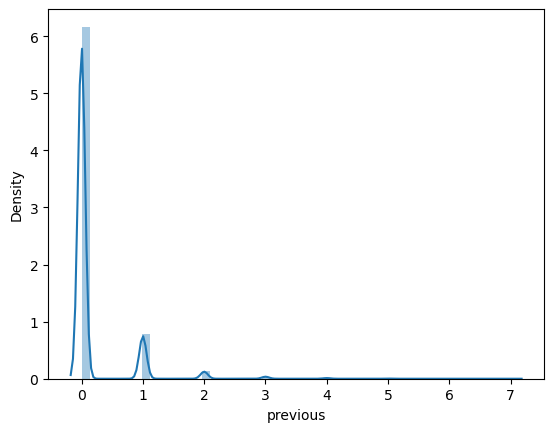

In [72]:
# For column previous
sns.distplot(bank['previous'])
# This numerical attribute is the number of previous contact between the bank and the client
# Notice that, it is pretty confusing to have a client whose 'pdays' = 999 while 'previous' is not 0
# This is interpreted as, the client was contacted in previous campaigns, however, in the last campaign right before 
# this campaign the client was not contacted

In [73]:
print("Skewness for previous :",skew(bank['previous']))

Skewness for previous : 3.8319026847007014


Transformations will be applied later

In [74]:
# For column poutcome
bank['poutcome'].value_counts()
# This catagorial attribute is interpreted as outcome of the previous marketing campaign

nonexistent    35563
failure         4252
success         1373
Name: poutcome, dtype: int64

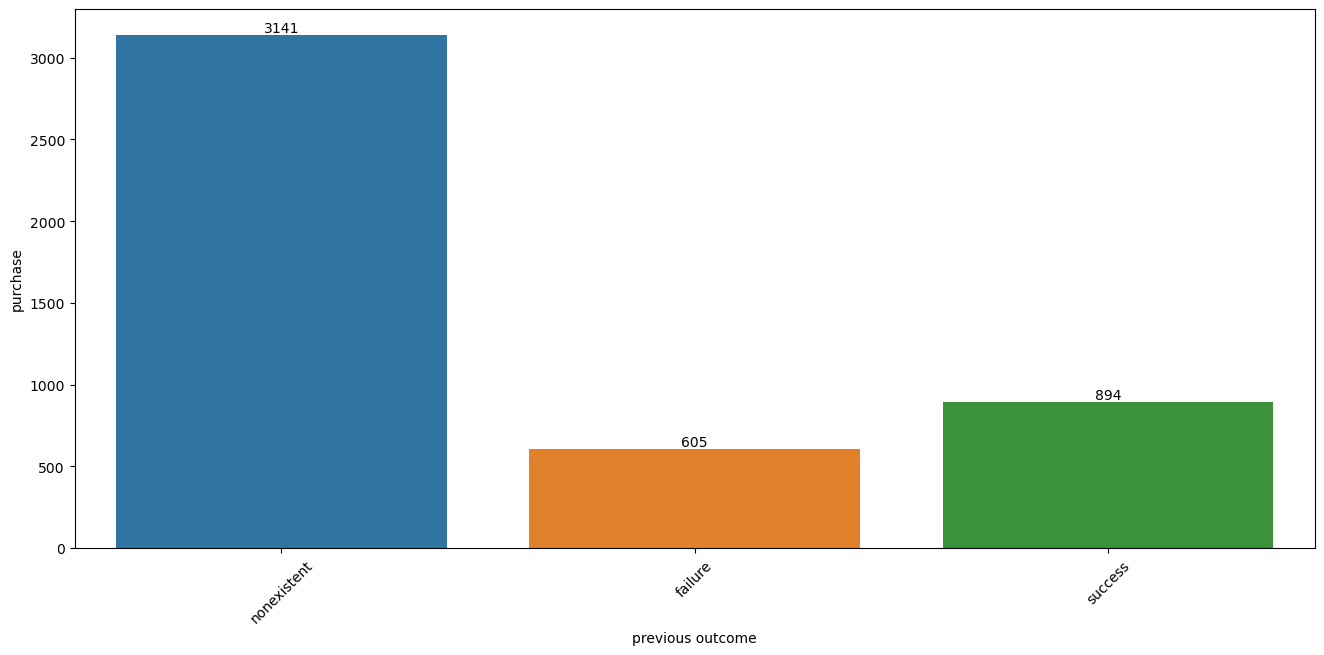

In [75]:
unique_p_outcome = list(bank['poutcome'].unique())
unique_p_outcome_num = []
for i in unique_p_outcome:
    j = bank[(bank['poutcome'] == i) & (bank['y'] == 'yes')]['y'].count()
    unique_p_outcome_num.append(j)


unique_p_outcome_dict = {'previous outcome': unique_p_outcome, 'purchase': unique_p_outcome_num}
unique_p_outcome_df = pd.DataFrame(unique_p_outcome_dict)

plt.figure(figsize=(16,7))
ax = sns.barplot(x= 'previous outcome', y='purchase',data = unique_p_outcome_df)
for i in ax.containers:
    ax.bar_label(i,)
plt.xticks(rotation=45)
plt.show()

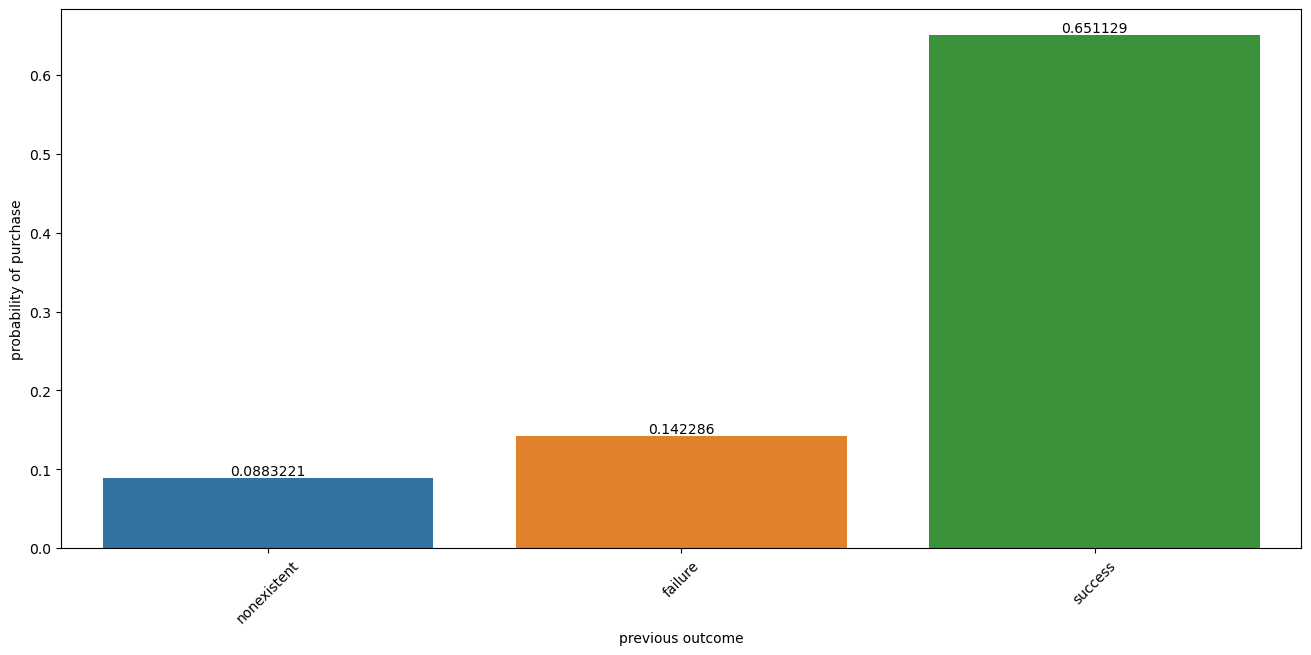

In [76]:
unique_p_outcome_portion = []
for i in unique_p_outcome:
    j = (bank[(bank['poutcome'] == i) & (bank['y'] == 'yes')]['y'].count())/(bank[bank['poutcome'] == i]['y'].count())
    unique_p_outcome_portion.append(j)


unique_p_outcome_portion_dict = {'previous outcome': unique_p_outcome, 'probability of purchase': unique_p_outcome_portion}
unique_p_outcome_portion_df = pd.DataFrame(unique_p_outcome_portion_dict)

unique_p_outcome_portion_df.head()
plt.figure(figsize=(16,7))
ax = sns.barplot(x='previous outcome',y='probability of purchase',data=unique_p_outcome_portion_df)
for i in ax.containers:
    ax.bar_label(i,)
plt.xticks(rotation=45)
plt.show()

It is pretty straightforward that, for those clients who purchased the termed deposit product before, more than half of them choose to buy it again in the latest campaign.

In [77]:
Previous_outcome = pd.get_dummies(bank['poutcome'], drop_first = True)
Previous_outcome.head()

,nonexistent,success
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [78]:
Previous_outcome = Previous_outcome.rename(columns = {"nonexistent":"no_previous_outcome", "success": 'previous_outcome_success'})
bank.drop(['poutcome'], axis=1, inplace = True)
bank = pd.concat([bank, Previous_outcome], axis = 1)

# Now we are done with all attributes relevant to previous contact information

We save our data at this moment as a dataframe called 'bank_preprocessed'

In [79]:
bank_preprocessed = bank.copy()

In [80]:
def outcome_converter(y):
    if y == 'no':
        return 0
    elif y == 'yes':
        return 1

In [81]:
bank_preprocessed['y'] = bank_preprocessed['y'].apply(outcome_converter)

# For the five socio-economic indexes, we observe the linear relation between them and number of deals made 

In [82]:
# for column emp.var.rate
# This attribute is employment variation rate (varies by quarter)

In [83]:
unique_emp_var_rate = list(bank['emp.var.rate'].unique())
unique_emp_var_rate_portion = []
for i in unique_emp_var_rate :
    j = (bank[(bank['emp.var.rate'] == i) & (bank['y'] == 'yes')]['y'].count())/(bank[bank['emp.var.rate'] == i]['y'].count())
    unique_emp_var_rate_portion.append(j)


unique_emp_var_rate_dict = {'emp.var.rate': unique_emp_var_rate, 'probability of purchase': unique_emp_var_rate_portion}
unique_emp_var_rate_portion_df = pd.DataFrame(unique_emp_var_rate_dict)

unique_emp_var_rate_portion_df

,emp.var.rate,probability of purchase
0,1.1,0.030916
1,1.4,0.053345
2,-0.1,0.062992
3,-0.2,0.100000
4,-1.8,0.159081
5,-2.9,0.357186
6,-3.4,0.423903
7,-3.0,0.511628
8,-1.7,0.521345
9,-1.1,0.474016


<Figure size 900x500 with 0 Axes>

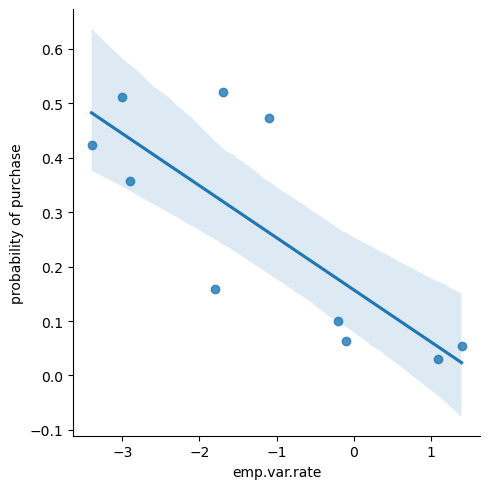

In [84]:
plt.figure(figsize=(9,5))
ax = sns.lmplot(x='emp.var.rate',y='probability of purchase', data=unique_emp_var_rate_portion_df)

From this graph, the probablity of purchase is inversly proportionate, though not very strong, to emp.var.rate

In [85]:
# for column cons.price.idx
# This attribute is consumer price index (CPI varies by month)

In [86]:
unique_cons_price_idx = list(bank['cons.price.idx'].unique())
unique_cons_price_idx_portion = []
for i in unique_cons_price_idx:
    j = (bank[(bank['cons.price.idx'] == i) & (bank['y'] == 'yes')]['y'].count())/(bank[bank['cons.price.idx'] == i]['y'].count())
    unique_cons_price_idx_portion.append(j)


unique_cons_price_idx_dict = {'cons.price.idx': unique_cons_price_idx, 'probability of purchase': unique_cons_price_idx_portion}
unique_cons_price_idx_portion_df = pd.DataFrame(unique_cons_price_idx_dict)

unique_cons_price_idx_portion_df

,cons.price.idx,probability of purchase
0,93.994,0.030916
1,94.465,0.042981
2,93.918,0.060883
3,93.444,0.052367
4,93.798,0.626866
5,93.200,0.052544
6,92.756,0.100000
7,92.843,0.446809
8,93.075,0.179821
9,92.893,0.090438


<Figure size 900x500 with 0 Axes>

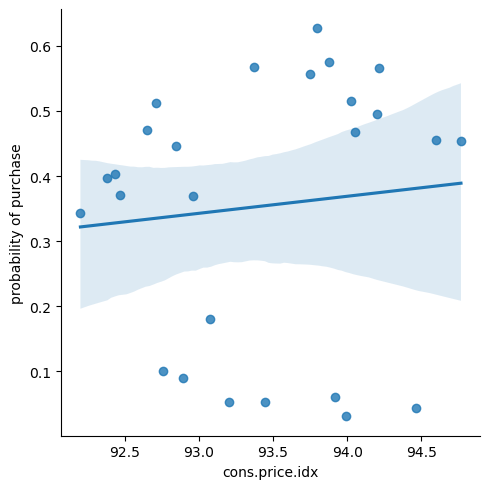

In [87]:
plt.figure(figsize=(9,5))
ax = sns.lmplot(x='cons.price.idx',y='probability of purchase', data=unique_cons_price_idx_portion_df)

The correlation between CPI and probability of purchase is also not really strong, however the weak relation shows that people are more likely to buy the termed deposit product when CPI is higher.

In [88]:
# for column cons.conf.idx
# This attribute is  consumer confidence index (Varies by month)

In [89]:
unique_cons_conf_idx = list(bank['cons.conf.idx'].unique())
unique_cons_conf_idx_portion = []
for i in unique_cons_conf_idx:
    j = (bank[(bank['cons.conf.idx'] == i) & (bank['y'] == 'yes')]['y'].count())/(bank[bank['cons.conf.idx'] == i]['y'].count())
    unique_cons_conf_idx_portion.append(j)


unique_cons_price_idx_dict = {'cons.conf.idx': unique_cons_conf_idx, 'probability of purchase': unique_cons_conf_idx_portion}
unique_cons_price_idx_portion = pd.DataFrame(unique_cons_price_idx_dict)

unique_cons_price_idx_portion

,cons.conf.idx,probability of purchase
0,-36.4,0.030916
1,-41.8,0.042981
2,-42.7,0.060883
3,-36.1,0.052367
4,-40.4,0.626866
5,-42.0,0.052544
6,-45.9,0.100000
7,-50.0,0.446809
8,-47.1,0.179821
9,-46.2,0.090438


<Figure size 900x500 with 0 Axes>

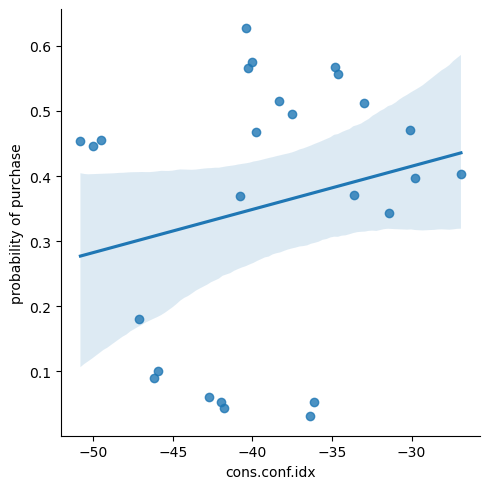

In [90]:
plt.figure(figsize=(9,5))
ax = sns.lmplot(x='cons.conf.idx',y='probability of purchase', data=unique_cons_price_idx_portion)

The weak relation between probabilility of purchase and consumer coefficient index reseambles the relation between probability of purchase and CPI

In [91]:
# for column euribor3m
# This attribute is euribor 3 month rate (Varies daily)

In [92]:
unique_euribor3m = list(bank['euribor3m'].unique())
unique_euribor3m_portion = []
for i in unique_euribor3m:
    j = (bank[(bank['euribor3m'] == i) & (bank['y'] == 'yes')]['y'].count())/(bank[bank['euribor3m'] == i]['y'].count())
    unique_euribor3m_portion.append(j)


unique_euribor3m_dict = {'euribor3m': unique_euribor3m , 'probability of purchase': unique_euribor3m_portion}
unique_euribor3m_portion = pd.DataFrame(unique_euribor3m_dict)

unique_euribor3m_portion

,euribor3m,probability of purchase
0,4.857,0.025105
1,4.856,0.026446
2,4.855,0.025000
3,4.859,0.038071
4,4.860,0.042601
...,...,...
311,1.039,0.333333
312,1.035,0.714286
313,1.030,0.333333
314,1.031,0.625000


<Figure size 900x500 with 0 Axes>

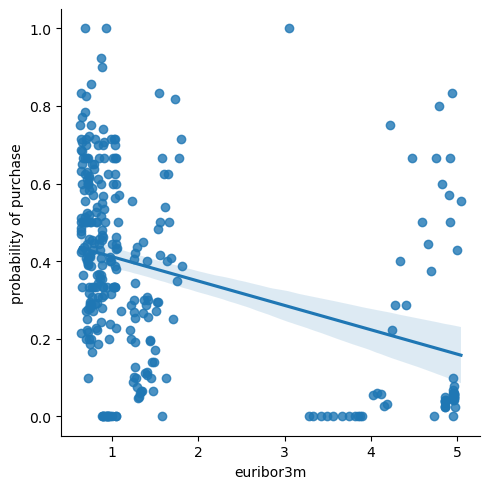

In [93]:
plt.figure(figsize=(9,5))
ax = sns.lmplot(x='euribor3m',y='probability of purchase', data=unique_euribor3m_portion)

The relation between probability of purchase and euribor 3 month rate is still not very evident.

In [94]:
# for column nr.employed
# This attribute is number of employees in thousand (Varies quarterly)

In [95]:
unique_nr_employed_idx = list(bank['nr.employed'].unique())
unique_nr_employed_idx_portion = []
for i in unique_nr_employed_idx:
    j = (bank[(bank['nr.employed'] == i) & (bank['y'] == 'yes')]['y'].count())/(bank[bank['nr.employed'] == i]['y'].count())
    unique_nr_employed_idx_portion.append(j)


unique_nr_employed_idx_dict = {'nr.employed': unique_nr_employed_idx, 'probability of purchase': unique_nr_employed_idx_portion}
unique_nr_employed_idx_portion = pd.DataFrame(unique_nr_employed_idx_dict)

unique_nr_employed_idx_portion

,nr.employed,probability of purchase
0,5191.0,0.030916
1,5228.1,0.053345
2,5195.8,0.062992
3,5176.3,0.100000
4,5099.1,0.127959
5,5076.2,0.357186
6,5017.5,0.423903
7,5023.5,0.511628
8,5008.7,0.567692
9,4991.6,0.521345


<Figure size 900x500 with 0 Axes>

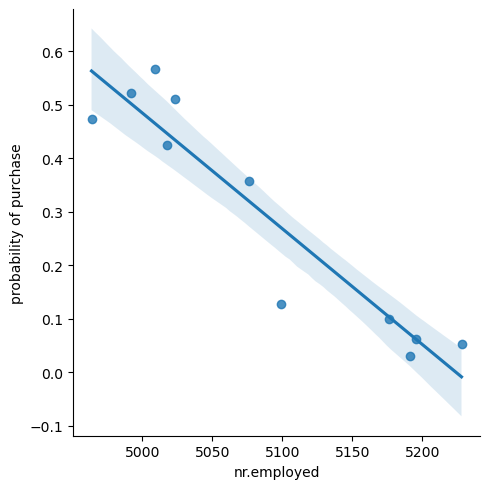

In [96]:
plt.figure(figsize=(9,5))
ax = sns.lmplot(x='nr.employed',y='probability of purchase', data=unique_nr_employed_idx_portion)

Surprisingly, looks like when there are more people employed, people are less likely to purchase the termed deposit product. And this attribute is the only socio-economic attribute that has strong correlatiion with probability of purchase. 

# Fine, now we are done with all attributes

# Our last step before model trainning is transformation for numerical attributes, including age, duration, campaign, previous and Days from last contact in last campaign (From pdays), since all these attributes have high skewness from the skewness test.

# Three different approaches will be used to deal with skewness and outliers in numerical attributes.

# Approach one: log transformation (This is only applicable for attributes without 0 values, which can't be applied directly to pdays, duration and previous, the solution is, adding one to those three columns and then take the log of the new value)

In [97]:
bank_preprocessed_for_log = bank_preprocessed.copy()

In [98]:
log_age = pd.DataFrame(np.log(bank['age']))
log_duration = pd.DataFrame(np.log(bank['duration'] + 1))
log_campaign = pd.DataFrame(np.log(bank['campaign']))
log_previous = pd.DataFrame(np.log(bank['previous'] + 1))
log_pdays = pd.DataFrame(np.sqrt(bank['Days from last contact in last campaign'] + 1))
bank_log_transformation = bank_preprocessed_for_log.drop(['age', 'duration','campaign','previous',
                                                            'Days from last contact in last campaign'], axis=1,inplace = True)
bank_log_transformation = pd.concat([bank_preprocessed_for_log, log_age, log_duration, 
                                      log_campaign, log_previous, log_pdays], axis = 1)
bank_log_transformation.head()

,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,blue-collar,entrepreneur,housemaid,management,...,tue,wed,Contaced_in_last_campaign_yes,no_previous_outcome,previous_outcome_success,age,duration,campaign,previous,Days from last contact in last campaign
0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,1,0,...,0,0,0,1,0,4.025352,5.568345,0.0,0.0,1.0
1,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,...,0,0,0,1,0,4.043051,5.010635,0.0,0.0,1.0
2,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,...,0,0,0,1,0,3.610918,5.424950,0.0,0.0,1.0
3,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,...,0,0,0,1,0,3.688879,5.023881,0.0,0.0,1.0
4,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,...,0,0,0,1,0,4.025352,5.730100,0.0,0.0,1.0


In [99]:
bank_log_transformation.rename(columns = {'Days from last contact in last campaign': 'pdays'}, inplace = True)

# Approach two: square root transformation

In [100]:
bank_preprocessed_for_sqrt = bank_preprocessed.copy()

In [101]:
sqrt_age = pd.DataFrame(np.sqrt(bank['age']))
sqrt_duration = pd.DataFrame(np.sqrt(bank['duration']))
sqrt_campaign = pd.DataFrame(np.sqrt(bank['campaign']))
sqrt_previous = pd.DataFrame(np.sqrt(bank['previous']))
sqrt_pdays = pd.DataFrame(np.sqrt(bank['Days from last contact in last campaign']))
bank_sqrt_transformation = bank_preprocessed_for_sqrt.drop(['age', 'duration','campaign','previous',
                                                            'Days from last contact in last campaign'], axis=1,inplace = True)
bank_sqrt_transformation = pd.concat([bank_preprocessed_for_sqrt, sqrt_age, sqrt_duration, 
                                      sqrt_campaign, sqrt_previous, sqrt_pdays], axis = 1)
bank_sqrt_transformation.head()

,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,blue-collar,entrepreneur,housemaid,management,...,tue,wed,Contaced_in_last_campaign_yes,no_previous_outcome,previous_outcome_success,age,duration,campaign,previous,Days from last contact in last campaign
0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,1,0,...,0,0,0,1,0,7.483315,16.155494,1.0,0.0,0.0
1,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,...,0,0,0,1,0,7.549834,12.206556,1.0,0.0,0.0
2,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,...,0,0,0,1,0,6.082763,15.033296,1.0,0.0,0.0
3,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,...,0,0,0,1,0,6.324555,12.288206,1.0,0.0,0.0
4,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,...,0,0,0,1,0,7.483315,17.521415,1.0,0.0,0.0


In [102]:
bank_sqrt_transformation.rename(columns = {'Days from last contact in last campaign': 'pdays'}, inplace = True)

# Approach three: box-cox transformation

In [216]:
bank_preprocessed_for_box_cox = bank_preprocessed.copy()

In [217]:
from scipy.stats import boxcox 

In [218]:
transformed_age, best_lambda_age = boxcox(bank_preprocessed_for_box_cox['age']) 
box_cox_age = pd.DataFrame({'age': list(transformed_age)})

In [219]:
# For attribute duration, it has 0 values,so we need to add one based on column duration for transformation
transformed_duration, best_lambda_duration = boxcox(1 + bank_preprocessed_for_box_cox['duration']) 
box_cox_duration = pd.DataFrame({'duration': list(transformed_duration)})

https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.boxcox1p.html

In [220]:
transformed_campaign, best_lambda_campaign = boxcox(bank_preprocessed_for_box_cox['campaign']) 
box_cox_campaign = pd.DataFrame({'campaign': list(transformed_campaign)})

In [221]:
# Same situation for column previous, so we need to add one based on column previous for transformation
transformed_previous, best_lambda_previous = boxcox(1 + bank_preprocessed_for_box_cox['previous']) 
box_cox_previous = pd.DataFrame({'previous': list(transformed_previous)})

In [222]:
# Same for column 'Days from last contact in last campaign'
transformed_pdays, best_lambda_pdays = boxcox(1 + bank_preprocessed_for_box_cox['Days from last contact in last campaign']) 
box_cox_pdays = pd.DataFrame({'pdays': list(transformed_pdays)})

In [223]:
bank_box_cox_transformation = bank_preprocessed_for_box_cox.drop(['age', 'duration','campaign','previous',
                                                            'Days from last contact in last campaign'], axis=1,inplace = True)
bank_box_cox_transformation = pd.concat([bank_preprocessed_for_box_cox, box_cox_age, box_cox_duration, 
                                      box_cox_campaign, box_cox_previous, box_cox_pdays], axis = 1)
bank_box_cox_transformation.head()

,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,blue-collar,entrepreneur,housemaid,management,...,tue,wed,Contaced_in_last_campaign_yes,no_previous_outcome,previous_outcome_success,age,duration,campaign,previous,pdays
0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,1,0,...,0,0,0,1,0,2.791734,8.048817,0.0,0.0,0.0
1,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,...,0,0,0,1,0,2.799812,6.967713,0.0,0.0,0.0
2,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,...,0,0,0,1,0,2.594422,7.763607,0.0,0.0,0.0
3,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,...,0,0,0,1,0,2.632764,6.992524,0.0,0.0,0.0
4,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,...,0,0,0,1,0,2.791734,8.376747,0.0,0.0,0.0


# Fine, so now in addition to the original dataframe, we have three more dataframes for model training.

# Time for model training! 

# In the model training section, we use Logistic Regression in the linear regression family, Decision Tree in the Ensemble model family, and Adaptive boosting model in the boosting model family.

Inport all packages needed

In [113]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTENC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification

# Balancing the data with the Imblearn package

# For log transformed data

Firstly let's play with the log transformed dataset

In [114]:
X_log = bank_log_transformation.drop('y', axis = 1)
Y_log = bank_log_transformation['y']

In [115]:
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X_log, Y_log, test_size = 0.3, random_state = 3)

In [116]:
print(y_train_log.value_counts())
# it looks like our data is super imbalanced... we will use SMOTE algorithm to oversample positive test cases

0    25589
1     3242
Name: y, dtype: int64


In [117]:
def smote_data(X, y):
    smotenc = SMOTENC(sampling_strategy = 1.0, categorical_features = list(range(5,49)), random_state = 3)
    X_smote, y_smote = smotenc.fit_resample(X, y)
    return X_smote, y_smote
X_train_log_smote, y_train_log_smote = smote_data(X_train_log, y_train_log)

In [118]:
print(y_train_log_smote.value_counts())
# Good now we have a balanced training dataset

0    25589
1    25589
Name: y, dtype: int64


# Logistic model for log transformed data

In [119]:
logmodel_log = LogisticRegression(solver='liblinear')
logmodel_log.fit(X_train_log_smote,y_train_log_smote)
pred_logistic_log = logmodel_log.predict(X_test_log)
print(classification_report(y_test_log,pred_logistic_log))

              precision    recall  f1-score   support

           0       0.96      0.89      0.92     10959
           1       0.46      0.72      0.56      1398

    accuracy                           0.87     12357
   macro avg       0.71      0.81      0.74     12357
weighted avg       0.90      0.87      0.88     12357



The overall precision, recall and f1 score are around 0.9. However, the precision for clients who purchased the product is too low, so additinal over-sampling might be needed.

# Logistic model for log transformed data with adjusted parameters

For logistic model we deal with two parameters: C, the hyperparameter, and Panelty, which is either l1 or l2

Parameter C implies the degree of dependence of the regression model on training data, it takes a positive float value. When larger C is used, it implies that we believe the training data is representative of the whole observation population, namely, the population of clients in our case. Therefore, even if the model splits out extreme coefficients for some attributes we should still believe in it. A lower C implies "don't trust your training data fuly since it might not be representative for the whole population".

To introduce Penalty, we need to know what is shrinkage method. Shrinkage method enables us to compress extra information from a large number of predictors, that is, filtering predictors that are less relevant to the output. A model is not considered desirable when its "cost function" is too high. What shrinkage method does is contraining the size of coefficients, therefore reducing the cost function value so the model can have smaller variance. 

Parameter Penalty is how we add an additional penalty value to the cost function. When we pick l1, it adds a term based on absolute values of coefficients to the cost function, and a term derived from the squared magnitude of coefficients is added when we use l2. l1 is also known as "Lasso Regression" and l2 is also known as "Ridge regression".

For more information on this topic, check this link out:
https://builtin.com/data-science/l2-regularization

In this project, we will use grid search to find the parameter combination that results in best precision, recall and f1 score.

In [120]:
grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2']
        }

In [121]:
gs_logistic = GridSearchCV(estimator = LogisticRegression(solver='liblinear', random_state = 3, max_iter = 10), param_grid = grid, scoring = 'recall',
                 refit = True, verbose = 1)
gs_logistic.fit(X_train_log_smote, y_train_log_smote)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


D:\Crucial_files\conda\envs\b_soup\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
D:\Crucial_files\conda\envs\b_soup\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
D:\Crucial_files\conda\envs\b_soup\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
D:\Crucial_files\conda\envs\b_soup\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
D:\Crucial_files\conda\envs\b_soup\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
D:\Crucial_files\conda\envs\b_soup\lib\site-packages\sklearn\svm\_base.py:1225: Convergenc

D:\Crucial_files\conda\envs\b_soup\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
D:\Crucial_files\conda\envs\b_soup\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
D:\Crucial_files\conda\envs\b_soup\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


GridSearchCV(estimator=LogisticRegression(max_iter=10, random_state=3,
                                          solver='liblinear'),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'penalty': ['l1', 'l2']},
             scoring='recall', verbose=1)

The reason that scoring is set as recall is that, higher recall for clients who will purchase the product means, more people identified as 'willing to purchase' will actually purchase the product, which is the desirable effect for our model.

Now let's check out the best parameter combination

In [122]:
# check best parameters / estimator
gs_logistic.best_params_

{'C': 0.01, 'penalty': 'l1'}

In [123]:
gs_logistic.best_estimator_

LogisticRegression(C=0.01, max_iter=10, penalty='l1', random_state=3,
                   solver='liblinear')

In [124]:
gs_logistic_predictions_log = gs_logistic.predict(X_test_log)

In [125]:
print(classification_report(y_test_log, gs_logistic_predictions_log))

              precision    recall  f1-score   support

           0       0.97      0.87      0.92     10959
           1       0.44      0.80      0.57      1398

    accuracy                           0.86     12357
   macro avg       0.71      0.84      0.75     12357
weighted avg       0.91      0.86      0.88     12357



From the classification report, the problem is still low precision for clients who purchased the termed deposit product even after parameter adjustment. Notice that, for the group of clients who purchased the product, this model has highest recall. Also, though classification outcome for clients who purchased the product is not that good, the overall accuracy and recall is still greater than 0.85 while the overall precision is greater than 0.9

# Decision Tree/Random Forest model for log transformed data

In [126]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train_log_smote,y_train_log_smote)
pred_dtree_log = dtree.predict(X_test_log)
print(classification_report(y_test_log,pred_dtree_log))

              precision    recall  f1-score   support

           0       0.94      0.91      0.93     10959
           1       0.45      0.55      0.50      1398

    accuracy                           0.87     12357
   macro avg       0.70      0.73      0.71     12357
weighted avg       0.89      0.87      0.88     12357



let's try bagging the Decision Tree model into a random forest to see whether the performance can be improved.

In [127]:
rfc = RandomForestClassifier(n_estimators=100) # This means we have 100 trees
rfc.fit(X_train_log_smote, y_train_log_smote)
pred_log_rf = rfc.predict(X_test_log)
print(classification_report(y_test_log, pred_log_rf))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94     10959
           1       0.55      0.65      0.59      1398

    accuracy                           0.90     12357
   macro avg       0.75      0.79      0.77     12357
weighted avg       0.91      0.90      0.90     12357



we can see that by using random forest, the precision for clients who purchased the product increased but the price is significantly impacting the recall for clients who purchased the product.

# Random Forest Model with adjusted parameters

For random forest classifier we have three parameters to adjust: Number of Estimators, Criterion, and Maximum Depth.

Number of Estimators,is namely the number of decision trees within a random forest.

Criterion is the splitting criterion, that is, the rules that the model decides where to generate a node and form two leaves on the try. This topic is more in depth and it will take way too much time to explain.

Maxixum Depth is simply the maximum number of layers for decision trees in the forest.

In [128]:
grid_rf = {
    'n_estimators': [100, 200, 300],
          'criterion': ['gini', 'entropy'],
          'max_depth': [5, 10, 15]
        }

In [129]:
gs_rf = GridSearchCV(estimator = RandomForestClassifier(), param_grid = grid_rf, scoring = 'recall',
                 refit = True, verbose = 1)
gs_rf.fit(X_train_log_smote, y_train_log_smote)
# Warning: this code block takes a few minutes to finish running

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 15],
                         'n_estimators': [100, 200, 300]},
             scoring='recall', verbose=1)

In [130]:
gs_rf.best_params_

{'criterion': 'entropy', 'max_depth': 10, 'n_estimators': 100}

In [131]:
gs_rf.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=10)

In [132]:
gs_rf_predictions_log = gs_rf.predict(X_test_log)

In [133]:
print(classification_report(y_test_log, gs_rf_predictions_log))

              precision    recall  f1-score   support

           0       0.98      0.86      0.92     10959
           1       0.45      0.86      0.59      1398

    accuracy                           0.86     12357
   macro avg       0.71      0.86      0.75     12357
weighted avg       0.92      0.86      0.88     12357



Same situation happened to the testing result: high recall for clients who bought the product combined with low precision.

# K-nearest Neighbor model for log transformed data

In [134]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train_log_smote,y_train_log_smote)
pred_knn_log = knn.predict(X_test_log)
print(classification_report(y_test_log, pred_knn_log))

              precision    recall  f1-score   support

           0       0.97      0.86      0.91     10959
           1       0.42      0.78      0.54      1398

    accuracy                           0.85     12357
   macro avg       0.69      0.82      0.73     12357
weighted avg       0.91      0.85      0.87     12357



We will try to find the best number of neighborhoods for K-nearest-model that can maximize outputs in the confusion matrix.

In [135]:
error_rate = []

for i in range(1,50):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_log_smote,y_train_log_smote)
    pred_i = knn.predict(X_test_log)
    error_rate.append(np.mean(pred_i != y_test_log))

Text(0, 0.5, 'Error Rate')

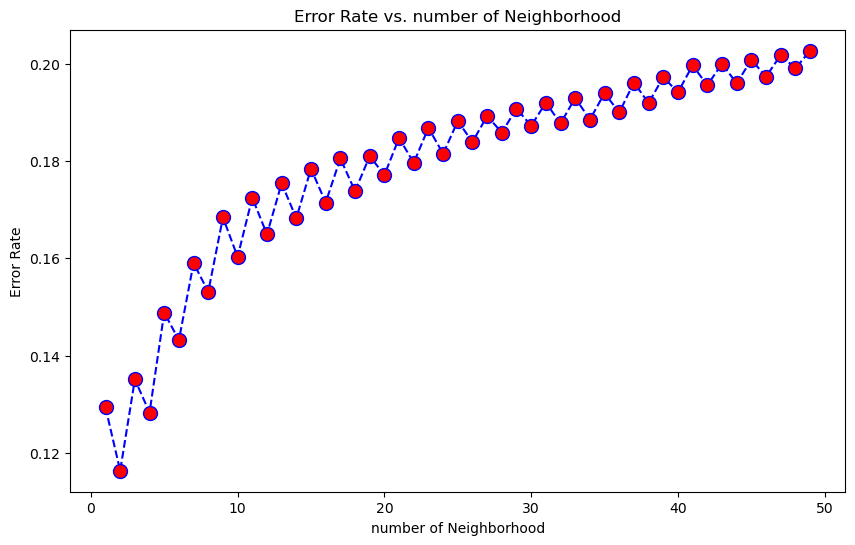

In [136]:
plt.figure(figsize=(10,6))
plt.plot(range(1,50),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. number of Neighborhood')
plt.xlabel('number of Neighborhood')
plt.ylabel('Error Rate')

From this graph, when number of neighborhood is exactly 2, the error rate reaches minimum value.

In [137]:
knn_adjusted = KNeighborsClassifier(n_neighbors = 2)
knn_adjusted.fit(X_train_log_smote,y_train_log_smote)
pred_knn_log = knn_adjusted.predict(X_test_log)
print(classification_report(y_test_log, pred_knn_log))

              precision    recall  f1-score   support

           0       0.94      0.93      0.93     10959
           1       0.49      0.52      0.50      1398

    accuracy                           0.88     12357
   macro avg       0.71      0.72      0.72     12357
weighted avg       0.89      0.88      0.89     12357



Interesting, although setting number of neighborhood as two lowers the error rate, the performance of model on clients who purchased the product got even worse. Therefore we will try larger numbers as number of neighborhood.

In [193]:
knn_adjusted = KNeighborsClassifier(n_neighbors = 10)
knn_adjusted.fit(X_train_log_smote,y_train_log_smote)
pred_knn_log = knn_adjusted.predict(X_test_log)
print(classification_report(y_test_log, pred_knn_log))

              precision    recall  f1-score   support

           0       0.98      0.84      0.90     10959
           1       0.40      0.84      0.54      1398

    accuracy                           0.84     12357
   macro avg       0.69      0.84      0.72     12357
weighted avg       0.91      0.84      0.86     12357



In [194]:
knn_adjusted = KNeighborsClassifier(n_neighbors = 15)
knn_adjusted.fit(X_train_log_smote,y_train_log_smote)
pred_knn_log = knn_adjusted.predict(X_test_log)
print(classification_report(y_test_log, pred_knn_log))

              precision    recall  f1-score   support

           0       0.98      0.81      0.89     10959
           1       0.38      0.89      0.53      1398

    accuracy                           0.82     12357
   macro avg       0.68      0.85      0.71     12357
weighted avg       0.92      0.82      0.85     12357



In [195]:
knn_adjusted = KNeighborsClassifier(n_neighbors = 20)
knn_adjusted.fit(X_train_log_smote,y_train_log_smote)
pred_knn_log = knn_adjusted.predict(X_test_log)
print(classification_report(y_test_log, pred_knn_log))

              precision    recall  f1-score   support

           0       0.98      0.81      0.89     10959
           1       0.38      0.89      0.53      1398

    accuracy                           0.82     12357
   macro avg       0.68      0.85      0.71     12357
weighted avg       0.92      0.82      0.85     12357



Unfortunately the precision for clients who bought the product got even worse, and the recall for clients who didn't buy the product was impacted too.

# Adaptive Boosting model for log transformed data

Seems like when implementing boosting on logistic regression, all observations are classified as 'not buying the product'...

In [138]:
ada_randomforest = AdaBoostClassifier(base_estimator = RandomForestClassifier(n_estimators=300, criterion = 'entropy', max_depth = 15), n_estimators=100, random_state=3, algorithm='SAMME')

In [139]:
ada_randomforest.fit(X_train_log_smote, y_train_log_smote)
pred_ada_randomforest = ada_randomforest.predict(X_test_log)
print(classification_report(y_test_log, pred_ada_randomforest))

              precision    recall  f1-score   support

           0       0.95      0.94      0.95     10959
           1       0.57      0.65      0.61      1398

    accuracy                           0.90     12357
   macro avg       0.76      0.79      0.78     12357
weighted avg       0.91      0.90      0.91     12357



This time the output is not that ridiculus, however it is not significantly improved comparing to the random forest classifier without boosting.

Now we are all set with log transformed data, among all models, the logistic model with tuned parameters have highest recall for clients who purchased the termed deposit product. For all models, the f1 score is round 0.90.

In our situation high recall for clients who purchased the termed deposit is more valued, since we want a bigger portion of clients whom the model claims that will purchase the product will actually purchase the product. Nevertheless, the precision shouldn't be too low as well since we don't want the model to classify too many clients as 'not purchasing the product' when they actually will do. 

# For square root transformed data

We perform the same model building for square root transformed data

In [140]:
X_sqrt = bank_sqrt_transformation.drop('y', axis = 1)
Y_sqrt = bank_sqrt_transformation['y']

In [141]:
X_train_sqrt, X_test_sqrt, y_train_sqrt, y_test_sqrt = train_test_split(X_sqrt, Y_sqrt, test_size = 0.3, random_state = 3)

In [142]:
print(y_train_sqrt.value_counts())
# Similary Smotenc is needed

0    25589
1     3242
Name: y, dtype: int64


In [143]:
X_train_sqrt_smote, y_train_sqrt_smote = smote_data(X_train_sqrt, y_train_sqrt)

In [144]:
print(y_train_sqrt_smote.value_counts())

0    25589
1    25589
Name: y, dtype: int64


# Logistic model for square root transformed data

In [145]:
logmodel_sqrt = LogisticRegression(solver='liblinear')
logmodel_sqrt.fit(X_train_sqrt_smote,y_train_sqrt_smote)
pred_logistic_sqrt = logmodel_sqrt.predict(X_test_sqrt)
print(classification_report(y_test_sqrt,pred_logistic_sqrt))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93     10959
           1       0.48      0.66      0.55      1398

    accuracy                           0.88     12357
   macro avg       0.72      0.79      0.74     12357
weighted avg       0.90      0.88      0.89     12357



# Logistic model for square root transformed data with adjusted parameters

In [146]:
grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2']
        }

In [147]:
gs_logistic = GridSearchCV(estimator = LogisticRegression(solver='liblinear', random_state = 3, max_iter = 10), param_grid = grid, scoring = 'recall',
                 refit = True, verbose = 1)
gs_logistic.fit(X_train_sqrt_smote, y_train_sqrt_smote)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


D:\Crucial_files\conda\envs\b_soup\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
D:\Crucial_files\conda\envs\b_soup\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
D:\Crucial_files\conda\envs\b_soup\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
D:\Crucial_files\conda\envs\b_soup\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
D:\Crucial_files\conda\envs\b_soup\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
D:\Crucial_files\conda\envs\b_soup\lib\site-packages\sklearn\svm\_base.py:1225: Convergenc

D:\Crucial_files\conda\envs\b_soup\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
D:\Crucial_files\conda\envs\b_soup\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
D:\Crucial_files\conda\envs\b_soup\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
D:\Crucial_files\conda\envs\b_soup\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
D:\Crucial_files\conda\envs\b_soup\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


GridSearchCV(estimator=LogisticRegression(max_iter=10, random_state=3,
                                          solver='liblinear'),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'penalty': ['l1', 'l2']},
             scoring='recall', verbose=1)

In [148]:
gs_logistic.best_params_

{'C': 0.01, 'penalty': 'l1'}

In [149]:
gs_logistic.best_estimator_

LogisticRegression(C=0.01, max_iter=10, penalty='l1', random_state=3,
                   solver='liblinear')

In [150]:
gs_logistic_predictions_sqrt = gs_logistic.predict(X_test_sqrt)

In [151]:
print(classification_report(y_test_sqrt, gs_logistic_predictions_sqrt))

              precision    recall  f1-score   support

           0       0.97      0.89      0.93     10959
           1       0.47      0.75      0.58      1398

    accuracy                           0.88     12357
   macro avg       0.72      0.82      0.75     12357
weighted avg       0.91      0.88      0.89     12357



The performance of logistic regression model on square root transformed data is slightly outmatched by the performance of logistic regression on log transformed data

# Decision Tree/Random Forest model for square root transformed data

In [152]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train_sqrt_smote,y_train_sqrt_smote)
pred_dtree_sqrt = dtree.predict(X_test_sqrt)
print(classification_report(y_test_sqrt, pred_dtree_sqrt))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93     10959
           1       0.47      0.56      0.51      1398

    accuracy                           0.88     12357
   macro avg       0.71      0.74      0.72     12357
weighted avg       0.89      0.88      0.88     12357



In [153]:
rfc = RandomForestClassifier(n_estimators=100) # This means we have 100 trees
rfc.fit(X_train_sqrt_smote, y_train_sqrt_smote)
pred_sqrt_rf = rfc.predict(X_test_sqrt)
print(classification_report(y_test_sqrt, pred_sqrt_rf))

              precision    recall  f1-score   support

           0       0.95      0.94      0.95     10959
           1       0.57      0.60      0.58      1398

    accuracy                           0.90     12357
   macro avg       0.76      0.77      0.76     12357
weighted avg       0.91      0.90      0.90     12357



The performance of Decision Tree/Random Forest model on both datasets doesn't differ a lot to each other.

# Random Forest Model with adjusted parameters

In [154]:
grid_rf = {
    'n_estimators': [100, 200, 300],
          'criterion': ['gini', 'entropy'],
          'max_depth': [5, 10, 15]
        }

In [156]:
gs_rf = GridSearchCV(estimator = RandomForestClassifier(), param_grid = grid_rf, scoring = 'recall',
                 refit = True, verbose = 1)
gs_rf.fit(X_train_sqrt_smote, y_train_sqrt_smote)
# Warning: this code block takes a few minutes to finish running

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 15],
                         'n_estimators': [100, 200, 300]},
             scoring='recall', verbose=1)

In [157]:
gs_rf.best_params_

{'criterion': 'entropy', 'max_depth': 10, 'n_estimators': 200}

In [158]:
gs_rf.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators=200)

In [159]:
gs_rf_predictions_sqrt = gs_rf.predict(X_test_sqrt)

In [160]:
print(classification_report(y_test_sqrt, gs_rf_predictions_sqrt))

              precision    recall  f1-score   support

           0       0.98      0.88      0.92     10959
           1       0.47      0.83      0.60      1398

    accuracy                           0.87     12357
   macro avg       0.72      0.86      0.76     12357
weighted avg       0.92      0.87      0.89     12357



# K-nearest Neighbor model for square root transformed data

In [161]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train_sqrt_smote,y_train_sqrt_smote)
pred_knn_sqrt = knn.predict(X_test_sqrt)
print(classification_report(y_test_sqrt, pred_knn_sqrt))

              precision    recall  f1-score   support

           0       0.98      0.85      0.91     10959
           1       0.42      0.85      0.57      1398

    accuracy                           0.85     12357
   macro avg       0.70      0.85      0.74     12357
weighted avg       0.92      0.85      0.87     12357



In [162]:
error_rate = []

for i in range(1,50):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_sqrt_smote,y_train_sqrt_smote)
    pred_i = knn.predict(X_test_sqrt)
    error_rate.append(np.mean(pred_i != y_test_sqrt))

Text(0, 0.5, 'Error Rate')

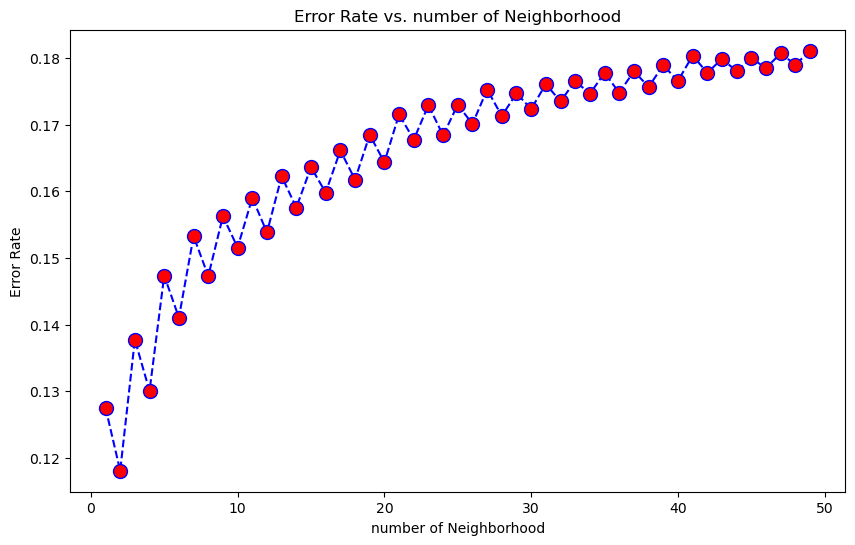

In [163]:
plt.figure(figsize=(10,6))
plt.plot(range(1,50),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. number of Neighborhood')
plt.xlabel('number of Neighborhood')
plt.ylabel('Error Rate')

Same outcome, error rate minimized when n = 2

In [164]:
knn_adjusted = KNeighborsClassifier(n_neighbors = 2)
knn_adjusted.fit(X_train_sqrt_smote,y_train_sqrt_smote)
pred_knn_sqrt = knn_adjusted.predict(X_test_sqrt)
print(classification_report(y_test_log, pred_knn_sqrt))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93     10959
           1       0.48      0.63      0.55      1398

    accuracy                           0.88     12357
   macro avg       0.72      0.77      0.74     12357
weighted avg       0.90      0.88      0.89     12357



Unfortunately the performance of K nearest neighbot with n = 2 is not good...

In [196]:
knn_adjusted = KNeighborsClassifier(n_neighbors = 10)
knn_adjusted.fit(X_train_sqrt_smote,y_train_sqrt_smote)
pred_knn_sqrt = knn_adjusted.predict(X_test_sqrt)
print(classification_report(y_test_log, pred_knn_sqrt))

              precision    recall  f1-score   support

           0       0.98      0.84      0.91     10959
           1       0.42      0.89      0.57      1398

    accuracy                           0.85     12357
   macro avg       0.70      0.87      0.74     12357
weighted avg       0.92      0.85      0.87     12357



In [197]:
knn_adjusted = KNeighborsClassifier(n_neighbors = 15)
knn_adjusted.fit(X_train_sqrt_smote,y_train_sqrt_smote)
pred_knn_sqrt = knn_adjusted.predict(X_test_sqrt)
print(classification_report(y_test_log, pred_knn_sqrt))

              precision    recall  f1-score   support

           0       0.99      0.82      0.90     10959
           1       0.40      0.93      0.56      1398

    accuracy                           0.84     12357
   macro avg       0.70      0.88      0.73     12357
weighted avg       0.92      0.84      0.86     12357



In [198]:
knn_adjusted = KNeighborsClassifier(n_neighbors = 20)
knn_adjusted.fit(X_train_sqrt_smote,y_train_sqrt_smote)
pred_knn_sqrt = knn_adjusted.predict(X_test_sqrt)
print(classification_report(y_test_log, pred_knn_sqrt))

              precision    recall  f1-score   support

           0       0.99      0.82      0.90     10959
           1       0.40      0.93      0.56      1398

    accuracy                           0.84     12357
   macro avg       0.70      0.88      0.73     12357
weighted avg       0.92      0.84      0.86     12357



The performance of KNN model on both datasets is also identical.

# Adaptive Boosting model for square root transformed data

In [165]:
ada_randomforest = AdaBoostClassifier(base_estimator = RandomForestClassifier(n_estimators=100, criterion = 'entropy', max_depth = 10), n_estimators=100, random_state=3, algorithm='SAMME')

In [166]:
ada_randomforest.fit(X_train_sqrt_smote, y_train_sqrt_smote)
pred_ada_randomforest = ada_randomforest.predict(X_test_sqrt)
print(classification_report(y_test_sqrt, pred_ada_randomforest))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94     10959
           1       0.53      0.70      0.60      1398

    accuracy                           0.89     12357
   macro avg       0.74      0.81      0.77     12357
weighted avg       0.91      0.89      0.90     12357



Summary: comparing to log transformed dataset, the dataset of square root transform is not really improved, but actually, a bit worse.

# For Box Cox Transformed Data

In [167]:
X_bc = bank_box_cox_transformation.drop('y', axis = 1)
Y_bc = bank_box_cox_transformation['y']

In [168]:
X_train_bc, X_test_bc, y_train_bc, y_test_bc = train_test_split(X_bc, Y_bc, test_size = 0.3, random_state = 3)

In [169]:
print(y_train_bc.value_counts())

0    25589
1     3242
Name: y, dtype: int64


In [170]:
X_train_bc_smote, y_train_bc_smote = smote_data(X_train_bc, y_train_bc)

In [171]:
print(y_train_bc_smote.value_counts())

0    25589
1    25589
Name: y, dtype: int64


# Logistic model for box-cox transformed data

In [172]:
logmodel_bc = LogisticRegression(solver='liblinear')
logmodel_bc.fit(X_train_bc_smote,y_train_bc_smote)
pred_bc_sqrt = logmodel_bc.predict(X_test_bc)
print(classification_report(y_test_bc,pred_bc_sqrt))

              precision    recall  f1-score   support

           0       0.96      0.88      0.92     10959
           1       0.45      0.75      0.56      1398

    accuracy                           0.87     12357
   macro avg       0.71      0.82      0.74     12357
weighted avg       0.91      0.87      0.88     12357



# Logistic model for box-cox transformed data with adjusted parameters

In [173]:
grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2']
        }

In [174]:
gs_bc = GridSearchCV(estimator = LogisticRegression(solver='liblinear', random_state = 3, max_iter = 10), param_grid = grid, scoring = 'recall',
                     refit = True, verbose = 1)
gs_bc.fit(X_train_bc_smote, y_train_bc_smote)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


D:\Crucial_files\conda\envs\b_soup\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
D:\Crucial_files\conda\envs\b_soup\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
D:\Crucial_files\conda\envs\b_soup\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
D:\Crucial_files\conda\envs\b_soup\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
D:\Crucial_files\conda\envs\b_soup\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
D:\Crucial_files\conda\envs\b_soup\lib\site-packages\sklearn\svm\_base.py:1225: Convergenc

D:\Crucial_files\conda\envs\b_soup\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
D:\Crucial_files\conda\envs\b_soup\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
D:\Crucial_files\conda\envs\b_soup\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
D:\Crucial_files\conda\envs\b_soup\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
D:\Crucial_files\conda\envs\b_soup\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


GridSearchCV(estimator=LogisticRegression(max_iter=10, random_state=3,
                                          solver='liblinear'),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'penalty': ['l1', 'l2']},
             scoring='recall', verbose=1)

In [175]:
gs_bc.best_params_

{'C': 0.01, 'penalty': 'l1'}

In [176]:
gs_bc.best_estimator_

LogisticRegression(C=0.01, max_iter=10, penalty='l1', random_state=3,
                   solver='liblinear')

In [177]:
gs_logistic_predictions_bc = gs_bc.predict(X_test_bc)

In [178]:
print(classification_report(y_test_bc, gs_logistic_predictions_bc))

              precision    recall  f1-score   support

           0       0.98      0.87      0.92     10959
           1       0.45      0.83      0.58      1398

    accuracy                           0.86     12357
   macro avg       0.71      0.85      0.75     12357
weighted avg       0.92      0.86      0.88     12357



# Decision Tree/Random Forest model for box-cox transformed data

In [179]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train_bc_smote,y_train_bc_smote)
pred_dtree_bc = dtree.predict(X_test_bc)
print(classification_report(y_test_bc, pred_dtree_bc))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93     10959
           1       0.46      0.57      0.51      1398

    accuracy                           0.88     12357
   macro avg       0.70      0.74      0.72     12357
weighted avg       0.89      0.88      0.88     12357



In [180]:
rfc = RandomForestClassifier(n_estimators=100) # This means we have 100 trees
rfc.fit(X_train_bc_smote, y_train_bc_smote)
pred_bc_rf = rfc.predict(X_test_bc)
print(classification_report(y_test_bc, pred_bc_rf))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94     10959
           1       0.54      0.63      0.58      1398

    accuracy                           0.90     12357
   macro avg       0.75      0.78      0.76     12357
weighted avg       0.91      0.90      0.90     12357



# Random Forest Model with adjusted parameters

In [181]:
grid_rf = {
    'n_estimators': [100, 200, 300],
          'criterion': ['gini', 'entropy'],
          'max_depth': [5, 10, 15]
        }

In [182]:
gs_rf = GridSearchCV(estimator = RandomForestClassifier(), param_grid = grid_rf, scoring = 'recall',
                 refit = True, verbose = 1)
gs_rf.fit(X_train_bc_smote, y_train_bc_smote)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 15],
                         'n_estimators': [100, 200, 300]},
             scoring='recall', verbose=1)

In [183]:
gs_rf.best_params_

{'criterion': 'entropy', 'max_depth': 15, 'n_estimators': 100}

In [184]:
gs_rf.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=15)

In [185]:
gs_rf_predictions_bc = gs_rf.predict(X_test_bc)

In [186]:
print(classification_report(y_test_bc, gs_rf_predictions_bc))

              precision    recall  f1-score   support

           0       0.97      0.89      0.93     10959
           1       0.49      0.80      0.61      1398

    accuracy                           0.88     12357
   macro avg       0.73      0.85      0.77     12357
weighted avg       0.92      0.88      0.90     12357



# K-nearest Neighbor model for box-cox transformed data

In [187]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train_bc_smote,y_train_bc_smote)
pred_knn_bc = knn.predict(X_test_bc)
print(classification_report(y_test_bc, pred_knn_bc))

              precision    recall  f1-score   support

           0       0.98      0.86      0.91     10959
           1       0.43      0.83      0.57      1398

    accuracy                           0.86     12357
   macro avg       0.70      0.85      0.74     12357
weighted avg       0.91      0.86      0.87     12357



In [188]:
error_rate = []

for i in range(1,50):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_bc_smote,y_train_bc_smote)
    pred_i = knn.predict(X_test_bc)
    error_rate.append(np.mean(pred_i != y_test_bc))

Text(0, 0.5, 'Error Rate')

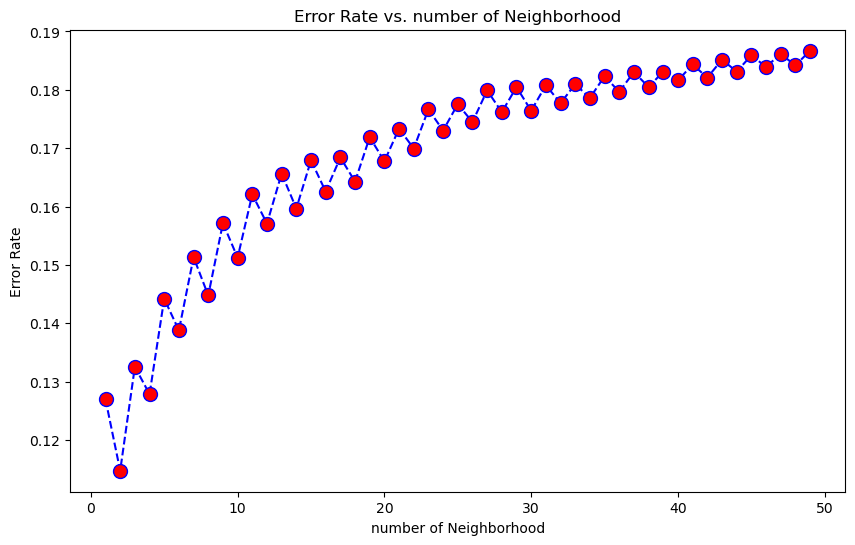

In [189]:
plt.figure(figsize=(10,6))
plt.plot(range(1,50),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. number of Neighborhood')
plt.xlabel('number of Neighborhood')
plt.ylabel('Error Rate')

In [190]:
knn_adjusted = KNeighborsClassifier(n_neighbors = 2)
knn_adjusted.fit(X_train_bc_smote,y_train_bc_smote)
pred_knn_bc = knn_adjusted.predict(X_test_bc)
print(classification_report(y_test_bc, pred_knn_bc))

              precision    recall  f1-score   support

           0       0.94      0.93      0.93     10959
           1       0.49      0.57      0.53      1398

    accuracy                           0.89     12357
   macro avg       0.72      0.75      0.73     12357
weighted avg       0.89      0.89      0.89     12357



# Adaptive Boosting model for box-cox transformed data

In [191]:
ada_randomforest = AdaBoostClassifier(base_estimator = RandomForestClassifier(n_estimators=200, criterion = 'entropy', max_depth = 15), n_estimators=100, random_state=3, algorithm='SAMME')

In [192]:
ada_randomforest.fit(X_train_bc_smote, y_train_bc_smote)
pred_ada_randomforest = ada_randomforest.predict(X_test_bc)
print(classification_report(y_test_bc, pred_ada_randomforest))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94     10959
           1       0.55      0.64      0.59      1398

    accuracy                           0.90     12357
   macro avg       0.75      0.79      0.77     12357
weighted avg       0.91      0.90      0.90     12357



# Summary

For all models we tried out, it is hard to elevate the precision of clients who purchased the product above 0.55, however, this is not a key issue, since our objective is to come up with a model that satisfies, for clients whom the model claims to be product buyers, most clients actually buy the product. This is reflected by the recall of clients who purchased the product. Therefore, we finally adpot the random forest model applied to box-cox transformed data, which has 0.5 precision and 0.8 recall for clients who purchased the termed deposit product.

In [224]:
bank_final_dataset = bank_box_cox_transformation.drop(['duration'], axis = 1)

To create a predictive model we have to remove the variable duration, since it can't be controlled.

In [225]:
bank_final_dataset.head()

,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,blue-collar,entrepreneur,housemaid,management,...,thu,tue,wed,Contaced_in_last_campaign_yes,no_previous_outcome,previous_outcome_success,age,campaign,previous,pdays
0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,1,0,...,0,0,0,0,1,0,2.791734,0.0,0.0,0.0
1,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,...,0,0,0,0,1,0,2.799812,0.0,0.0,0.0
2,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,...,0,0,0,0,1,0,2.594422,0.0,0.0,0.0
3,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,...,0,0,0,0,1,0,2.632764,0.0,0.0,0.0
4,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,...,0,0,0,0,1,0,2.791734,0.0,0.0,0.0


In [227]:
X = bank_final_dataset.drop('y', axis = 1)
Y = bank_final_dataset['y']

In [228]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 3)

In [229]:
print(y_train.value_counts())

0    25589
1     3242
Name: y, dtype: int64


In [230]:
X_train_smote, y_train_smote = smote_data(X_train, y_train)

In [231]:
print(y_train_smote.value_counts())

0    25589
1    25589
Name: y, dtype: int64


In [232]:
rfc = RandomForestClassifier(n_estimators=100, criterion = 'entropy', max_depth = 15) # This means we have 100 trees
rfc.fit(X_train_smote, y_train_smote)
pred = rfc.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.94      0.91      0.93     10959
           1       0.44      0.52      0.48      1398

    accuracy                           0.87     12357
   macro avg       0.69      0.72      0.70     12357
weighted avg       0.88      0.87      0.87     12357



In [269]:
ada_randomforest = AdaBoostClassifier(base_estimator = RandomForestClassifier(n_estimators=100, criterion = 'entropy', max_depth = 15), n_estimators=100, random_state=3, algorithm='SAMME')
ada_randomforest.fit(X_train_smote, y_train_smote)
pred_ada_randomforest = ada_randomforest.predict(X_test)
print(classification_report(y_test, pred_ada_randomforest))

              precision    recall  f1-score   support

           0       0.92      0.93      0.93     10959
           1       0.43      0.40      0.42      1398

    accuracy                           0.87     12357
   macro avg       0.68      0.67      0.67     12357
weighted avg       0.87      0.87      0.87     12357



Wait, why the performance of our model degrades a lot? It is needed to runa thorough inspection.

From the other three datasets attached, they don't have the three socio-economic indexes, so let's try training the model without those indexes.

In [241]:
bank_final_dataset_reduced = bank_final_dataset.drop(['emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed'], axis = 1)

In [243]:
bank_final_dataset_reduced.head()

,y,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,...,thu,tue,wed,Contaced_in_last_campaign_yes,no_previous_outcome,previous_outcome_success,age,campaign,previous,pdays
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,2.791734,0.0,0.0,0.0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,2.799812,0.0,0.0,0.0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,2.594422,0.0,0.0,0.0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,2.632764,0.0,0.0,0.0
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,2.791734,0.0,0.0,0.0


In [244]:
def smote_data(X, y):
    smotenc = SMOTENC(sampling_strategy = 1.0, categorical_features = list(range(0,44)), random_state = 3)
    X_smote, y_smote = smotenc.fit_resample(X, y)
    return X_smote, y_smote

In [246]:
X_reduced = bank_final_dataset_reduced.drop('y', axis = 1)
Y_reduced = bank_final_dataset_reduced['y']
X_train_reduced, X_test_reduced, y_train_reduced, y_test_reduced = train_test_split(X_reduced, Y_reduced, test_size = 0.3, random_state = 3)
X_train_reduced_smote, y_train_reduced_smote = smote_data(X_train_reduced, y_train_reduced)

In [249]:
logmodel = LogisticRegression(solver='liblinear')
logmodel.fit(X_train_reduced_smote,y_train_reduced_smote)
pred_logistic = logmodel.predict(X_test_reduced)
print(classification_report(y_test_reduced,pred_logistic))

              precision    recall  f1-score   support

           0       0.92      0.83      0.87     10959
           1       0.25      0.45      0.32      1398

    accuracy                           0.79     12357
   macro avg       0.59      0.64      0.60     12357
weighted avg       0.85      0.79      0.81     12357



In [251]:
logmodel = LogisticRegression(solver='liblinear')
logmodel.fit(X_train_reduced,y_train_reduced)
pred_logistic = logmodel.predict(X_test_reduced)
print(classification_report(y_test_reduced,pred_logistic))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94     10959
           1       0.64      0.18      0.28      1398

    accuracy                           0.90     12357
   macro avg       0.77      0.58      0.61     12357
weighted avg       0.87      0.90      0.87     12357



In [252]:
grid_rf = {
    'n_estimators': [100, 200, 300],
          'criterion': ['gini', 'entropy'],
          'max_depth': [5, 10, 15]
        }

In [253]:
gs_rf = GridSearchCV(estimator = RandomForestClassifier(), param_grid = grid_rf,
                 refit = True, verbose = 1)
gs_rf.fit(X_train_reduced_smote, y_train_reduced_smote)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 15],
                         'n_estimators': [100, 200, 300]},
             verbose=1)

In [255]:
gs_rf_predictions_bc = gs_rf.predict(X_test_reduced)

In [256]:
print(classification_report(y_test_reduced, gs_rf_predictions_bc))

              precision    recall  f1-score   support

           0       0.93      0.85      0.89     10959
           1       0.30      0.51      0.38      1398

    accuracy                           0.81     12357
   macro avg       0.62      0.68      0.63     12357
weighted avg       0.86      0.81      0.83     12357



In [268]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train_reduced_smote,y_train_reduced_smote)
pred_knn_bc = knn.predict(X_test_reduced)
print(classification_report(y_test_reduced, pred_knn_bc))

              precision    recall  f1-score   support

           0       0.92      0.84      0.88     10959
           1       0.27      0.46      0.34      1398

    accuracy                           0.80     12357
   macro avg       0.60      0.65      0.61     12357
weighted avg       0.85      0.80      0.82     12357



Sadly, by droping the column 'duration', the performance of all models went far more worse. Therefore, we can only stick to the first random forest model.

Notice that although the model performance is poor, it still has precision and recall around 0.5 for clients who purchased the product, this is far more better then the initial rate of success reflected from the initial data set, which is less then one over ten. (We had 4640 successes and 36548 failures.)

In [272]:
rfc_final = RandomForestClassifier(n_estimators=100, criterion = 'entropy', max_depth = 15) # This means we have 100 trees
rfc_final.fit(X_train_smote, y_train_smote)
pred = rfc.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.94      0.91      0.93     10959
           1       0.44      0.52      0.48      1398

    accuracy                           0.87     12357
   macro avg       0.69      0.72      0.70     12357
weighted avg       0.88      0.87      0.87     12357



# Model extraction

In [270]:
import pickle

In [273]:
pickle.dump(rfc_final, open('bank_marketing_model.pkl','wb'))

# Loading model to compare the results
diabetes_model = pickle.load(open('bank_marketing_model.pkl','rb'))